# Micro-Credit Defaulter Model
## Problem Statement: 
A Microfinance Institution (MFI) is an organization that offers financial services to low income populations. MFS becomes very useful when targeting especially the unbanked poor families living in remote areas with not much sources of income. The Microfinance services (MFS) provided by MFI are Group Loans, Agricultural Loans, Individual Business Loans and so on. 

Many microfinance institutions (MFI), experts and donors are supporting the idea of using mobile financial services (MFS) which they feel are more convenient and efficient, and cost saving, than the traditional high-touch model used since long for the purpose of delivering microfinance services. Though, the MFI industry is primarily focusing on low income families and are very useful in such areas, the implementation of MFS has been uneven with both significant challenges and successes.

Today, microfinance is widely accepted as a poverty-reduction tool, representing $70 billion in outstanding loans and a global outreach of 200 million clients.

We are working with one such client that is in Telecom Industry. They are a fixed wireless telecommunications network provider. They have launched various products and have developed its business and organization based on the budget operator model, offering better products at Lower Prices to all value conscious customers through a strategy of disruptive innovation that focuses on the subscriber. 

They understand the importance of communication and how it affects a person’s life, thus, focusing on providing their services and products to low income families and poor customers that can help them in the need of hour. 
They are collaborating with an MFI to provide micro-credit on mobile balances to be paid back in 5 days. The Consumer is believed to be defaulter if he deviates from the path of paying back the loaned amount within the time duration of 5 days. For the loan amount of 5 (in Indonesian Rupiah), payback amount should be 6 (in Indonesian Rupiah), while, for the loan amount of 10 (in Indonesian Rupiah), the payback amount should be 12 (in Indonesian Rupiah). 

The sample data is provided to us from our client database. It is hereby given to you for this exercise. In order to improve the selection of customers for the credit, the client wants some predictions that could help them in further investment and improvement in selection of customers. 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
des = pd.ExcelFile('Data_Description.xlsx')
des1 = pd.read_excel(des, 'Description')

des1

Variable                                         Definition  \
0                  label  Flag indicating whether the user paid back the...   
1                 msisdn                              mobile number of user   
2                    aon                    age on cellular network in days   
3           daily_decr30  Daily amount spent from main account, averaged...   
4           daily_decr90  Daily amount spent from main account, averaged...   
5               rental30     Average main account balance over last 30 days   
6               rental90     Average main account balance over last 90 days   
7      last_rech_date_ma  Number of days till last recharge of main account   
8      last_rech_date_da  Number of days till last recharge of data account   
9       last_rech_amt_ma  Amount of last recharge of main account (in In...   
10         cnt_ma_rech30  Number of times main account got recharged in ...   
11          fr_ma_rech30  Frequency of main account recharged in last 30...   
12     sumamnt_ma_rech30  Total amount of recharge in main account over ...   
13  medianamnt_ma_rech30  Median of amount of recharges done in main acc...   
14  medianmarechprebal30  Median of main account balance just before rec...   
15         cnt_ma_rech90  Number of times main account got recharged in ...   
16          fr_ma_rech90  Frequency of main account recharged in last 90...   
17     sumamnt_ma_rech90  Total amount of recharge in main account over ...   
18  medianamnt_ma_rech90  Median of amount of recharges done in main acc...   
19  medianmarechprebal90  Median of main account balance just before rec...   
20         cnt_da_rech30  Number of times data account got recharged in ...   
21          fr_da_rech30  Frequency of data account recharged in last 30...   
22         cnt_da_rech90  Number of times data account got recharged in ...   
23          fr_da_rech90  Frequency of data account recharged in last 90...   
24           cnt_loans30      Number of loans taken by user in last 30 days   
25          amnt_loans30  Total amount of loans taken by user in last 30...   
26       maxamnt_loans30  maximum amount of loan taken by the user in la...   
27    medianamnt_loans30  Median of amounts of loan taken by the user in...   
28           cnt_loans90      Number of loans taken by user in last 90 days   
29          amnt_loans90  Total amount of loans taken by user in last 90...   
30       maxamnt_loans90  maximum amount of loan taken by the user in la...   
31    medianamnt_loans90  Median of amounts of loan taken by the user in...   
32             payback30     Average payback time in days over last 30 days   
33             payback90     Average payback time in days over last 90 days   
34               pcircle                                     telecom circle   
35                 pdate                                               date   

                                              Comment  
0                                                 NaN  
1                                                 NaN  
2                                                 NaN  
3                                                 NaN  
4                                                 NaN  
5                          Unsure of given definition  
6                          Unsure of given definition  
7                                                 NaN  
8                                                 NaN  
9                                                 NaN  
10                                                NaN  
11                         Unsure of given definition  
12                                                NaN  
13                                                NaN  
14                                                NaN  
15                                                NaN  
16                         Unsure of given definition  
17                                                NaN  
18                          

In [3]:
df = pd.read_csv('Micro file.csv')
df

Unnamed: 0  label       msisdn     aon  daily_decr30  daily_decr90  \
0                1      0  21408I70789   272.0   3055.050000   3065.150000   
1                2      1  76462I70374   712.0  12122.000000  12124.750000   
2                3      1  17943I70372   535.0   1398.000000   1398.000000   
3                4      1  55773I70781   241.0     21.228000     21.228000   
4                5      1  03813I82730   947.0    150.619333    150.619333   
...            ...    ...          ...     ...           ...           ...   
209588      209589      1  22758I85348   404.0    151.872333    151.872333   
209589      209590      1  95583I84455  1075.0     36.936000     36.936000   
209590      209591      1  28556I85350  1013.0  11843.111667  11904.350000   
209591      209592      1  59712I82733  1732.0  12488.228333  12574.370000   
209592      209593      1  65061I85339  1581.0   4489.362000   4534.820000   

        rental30  rental90  last_rech_date_ma  last_rech_date_da  ...  \
0         220.13    260.13                2.0                0.0  ...   
1        3691.26   3691.26               20.0                0.0  ...   
2         900.13    900.13                3.0                0.0  ...   
3         159.42    159.42               41.0                0.0  ...   
4        1098.90   1098.90                4.0                0.0  ...   
...          ...       ...                ...                ...  ...   
209588   1089.19   1089.19                1.0                0.0  ...   
209589   1728.36   1728.36                4.0                0.0  ...   
209590   5861.83   8893.20                3.0                0.0  ...   
209591    411.83    984.58                2.0               38.0  ...   
209592    483.92    631.20               13.0                0.0  ...   

        maxamnt_loans30  medianamnt_loans30  cnt_loans90  amnt_loans90  \
0                   6.0                 0.0          2.0            12   
1                  12.0                 0.0          1.0            12   
2                   6.0                 0.0          1.0             6   
3                   6.0                 0.0          2.0            12   
4                   6.0                 0.0          7.0            42   
...                 ...                 ...          ...           ...   
209588              6.0                 0.0          2.0            12   
209589              6.0                 0.0          3.0            18   
209590             12.0                 0.0          6.0            54   
209591             12.0                 0.0          3.0            24   
209592             12.0                 0.0          2.0            18   

        maxamnt_loans90  medianamnt_loans90  payback30  payback90  pcircle  \
0                     6                 0.0  29.000000  29.000000      UPW   
1                    12                 0.0   0.000000   0.000000      UPW   
2                     6                 0.0   0.000000   0.000000      UPW   
3                     6                 0.0   0.000000   0.000000      UPW   
4                     6                 0.0   2.333333   2.333333      UPW   
...                 ...                 ...        ...        ...      ...   
209588                6                 0.0   1.000000   1.000000      UPW   
209589                6                 0.0   1.000000   1.000000      UPW   
209590               12                 0.0   4.000000   3.833333      UPW   
209591               12                 0.0   0.000000  10.500000      UPW   
209592               12                 0.0   0.000000   0.000000      UPW   

             pdate  
0       2016-07-20  
1       2016-08-10  
2       2016-08-19  
3       2016-06-06  
4       2016-06-22  
...            ...  
209588  2016-06-17  
209589  2016-06-12  
209590  2016-07-29  
209591  2016-07-25  
209592  2016-07-07  

[209593 rows x 37 columns]

In [4]:
df.drop('Unnamed: 0',axis = 1,inplace=True)

In [5]:
print('Number of Rows: ',df.shape[0])
print('Number of Clumns: ',df.shape[1])
pd.set_option('display.max_columns',None)
df.head()

Number of Rows:  209593
Number of Clumns:  36


label       msisdn    aon  daily_decr30  daily_decr90  rental30  rental90  \
0      0  21408I70789  272.0   3055.050000   3065.150000    220.13    260.13   
1      1  76462I70374  712.0  12122.000000  12124.750000   3691.26   3691.26   
2      1  17943I70372  535.0   1398.000000   1398.000000    900.13    900.13   
3      1  55773I70781  241.0     21.228000     21.228000    159.42    159.42   
4      1  03813I82730  947.0    150.619333    150.619333   1098.90   1098.90   

   last_rech_date_ma  last_rech_date_da  last_rech_amt_ma  cnt_ma_rech30  \
0                2.0                0.0              1539              2   
1               20.0                0.0              5787              1   
2                3.0                0.0              1539              1   
3               41.0                0.0               947              0   
4                4.0                0.0              2309              7   

   fr_ma_rech30  sumamnt_ma_rech30  medianamnt_ma_rech30  \
0          21.0             3078.0                1539.0   
1           0.0             5787.0                5787.0   
2           0.0             1539.0                1539.0   
3           0.0                0.0                   0.0   
4           2.0            20029.0                2309.0   

   medianmarechprebal30  cnt_ma_rech90  fr_ma_rech90  sumamnt_ma_rech90  \
0                  7.50              2            21               3078   
1                 61.04              1             0               5787   
2                 66.32              1             0               1539   
3                  0.00              1             0                947   
4                 29.00              8             2              23496   

   medianamnt_ma_rech90  medianmarechprebal90  cnt_da_rech30  fr_da_rech30  \
0                1539.0                  7.50            0.0           0.0   
1                5787.0                 61.04            0.0           0.0   
2                1539.0                 66.32            0.0           0.0   
3                 947.0                  2.50            0.0           0.0   
4                2888.0                 35.00            0.0           0.0   

   cnt_da_rech90  fr_da_rech90  cnt_loans30  amnt_loans30  maxamnt_loans30  \
0              0             0            2            12              6.0   
1              0             0            1            12             12.0   
2              0             0            1             6              6.0   
3              0             0            2            12              6.0   
4              0             0            7            42              6.0   

   medianamnt_loans30  cnt_loans90  amnt_loans90  maxamnt_loans90  \
0                 0.0          2.0            12                6   
1                 0.0          1.0            12               12   
2                 0.0          1.0             6                6   
3                 0.0          2.0            12                6   
4                 0.0          7.0            42                6   

   medianamnt_loans90  payback30  payback90 pcircle       pdate  
0                 0.0  29.000000  29.000000     UPW  2016-07-20  
1                 0.0   0.000000   0.000000     UPW  2016-08-10  
2                 0.0   0.000000   0.000000     UPW  2016-08-19  
3                 0.0   0.000000   0.000000     UPW  2016-06-06  
4                 0.0   2.333333   2.333333     UPW  2016-06-22

- label : Flag indicating whether the user paid back the credit amount within 5 days of issuing the loan{1:success, 0:failure}
- msisdn : mobile number of user
- aon : age on cellular network in days
- daily_decr30 : Daily amount spent from main account, averaged over last 30 days (in Indonesian Rupiah)
- daily_decr90 : Daily amount spent from main account, averaged over last 90 days (in Indonesian Rupiah)
- rental30 : Average main account balance over last 30 days
- rental90 : Average main account balance over last 90 days
- last_rech_date_ma : Number of days till last recharge of main account
- last_rech_date_da: Number of days till last recharge of data account
- last_rech_amt_ma : Amount of last recharge of main account (in Indonesian Rupiah)
- cnt_ma_rech30 : Number of times main account got recharged in last 30 days
- fr_ma_rech30 : Frequency of main account recharged in last 30 days
- sumamnt_ma_rech30 : Total amount of recharge in main account over last 30 days (in Indonesian Rupiah)
- medianamnt_ma_rech30 : Median of amount of recharges done in main account over last 30 days at user level (in Indonesian Rupiah)
- medianmarechprebal30 : Median of main account balance just before recharge in last 30 days at user level (in Indonesian Rupiah)
- cnt_ma_rech90 : Number of times main account got recharged in last 90 days
- fr_ma_rech90 : Frequency of main account recharged in last 90 days
- sumamnt_ma_rech90 : Total amount of recharge in main account over last 90 days (in Indonasian Rupiah)
- medianamnt_ma_rech90 : Median of amount of recharges done in main account over last 90 days at user level (in Indonasian Rupiah)
- medianmarechprebal90 : Median of main account balance just before recharge in last 90 days at user level (in Indonasian Rupiah)
- cnt_da_rech30 : Number of times data account got recharged in last 30 days
- fr_da_rech30: Frequency of data account recharged in last 30 days
- cnt_da_rech90 : Number of times data account got recharged in last 90 days
- fr_da_rech90 : Frequency of data account recharged in last 90 days
- cnt_loans30 : Number of loans taken by user in last 30 days
- amnt_loans30 : Total amount of loans taken by user in last 30 days
- maxamnt_loans30 : maximum amount of loan taken by the user in last 30 days
- medianamnt_loans30 : Median of amounts of loan taken by the user in last 30 days
- cnt_loans90 : Number of loans taken by user in last 90 days
- amnt_loans90 : Total amount of loans taken by user in last 90 days
- maxamnt_loans90 : maximum amount of loan taken by the user in last 90 days
- medianamnt_loans90 : Median of amounts of loan taken by the user in last 90 days
- payback30 : Average payback time in days over last 30 days
- payback90 : Average payback time in days over last 90 days
- pcircle : telecom circle
- pdate : date

In [6]:
df.pdate.unique()

array(['2016-07-20', '2016-08-10', '2016-08-19', '2016-06-06',
       '2016-06-22', '2016-07-02', '2016-07-05', '2016-08-05',
       '2016-06-15', '2016-06-08', '2016-06-12', '2016-06-20',
       '2016-06-29', '2016-06-16', '2016-08-03', '2016-06-24',
       '2016-07-04', '2016-07-03', '2016-07-01', '2016-08-08',
       '2016-06-26', '2016-06-23', '2016-07-06', '2016-07-09',
       '2016-06-10', '2016-06-07', '2016-06-27', '2016-08-11',
       '2016-06-30', '2016-06-19', '2016-07-26', '2016-08-14',
       '2016-06-14', '2016-06-21', '2016-06-25', '2016-06-28',
       '2016-06-11', '2016-07-27', '2016-07-23', '2016-08-16',
       '2016-08-15', '2016-06-02', '2016-06-05', '2016-08-02',
       '2016-07-28', '2016-07-18', '2016-08-18', '2016-07-16',
       '2016-07-29', '2016-07-21', '2016-06-03', '2016-06-13',
       '2016-08-01', '2016-07-13', '2016-07-10', '2016-06-09',
       '2016-07-15', '2016-07-11', '2016-08-09', '2016-08-12',
       '2016-07-22', '2016-06-04', '2016-07-24', '2016-

In [7]:
# Extracting Day from pdate column
df["Day"] = pd.to_datetime(df.pdate, format="%Y/%m/%d").dt.day

# Extracting Month from pdate column
df["Month"] = pd.to_datetime(df.pdate, format="%Y/%m/%d").dt.month

df.drop("pdate", inplace = True, axis = 1)
df

label       msisdn     aon  daily_decr30  daily_decr90  rental30  \
0           0  21408I70789   272.0   3055.050000   3065.150000    220.13   
1           1  76462I70374   712.0  12122.000000  12124.750000   3691.26   
2           1  17943I70372   535.0   1398.000000   1398.000000    900.13   
3           1  55773I70781   241.0     21.228000     21.228000    159.42   
4           1  03813I82730   947.0    150.619333    150.619333   1098.90   
...       ...          ...     ...           ...           ...       ...   
209588      1  22758I85348   404.0    151.872333    151.872333   1089.19   
209589      1  95583I84455  1075.0     36.936000     36.936000   1728.36   
209590      1  28556I85350  1013.0  11843.111667  11904.350000   5861.83   
209591      1  59712I82733  1732.0  12488.228333  12574.370000    411.83   
209592      1  65061I85339  1581.0   4489.362000   4534.820000    483.92   

        rental90  last_rech_date_ma  last_rech_date_da  last_rech_amt_ma  \
0         260.13                2.0                0.0              1539   
1        3691.26               20.0                0.0              5787   
2         900.13                3.0                0.0              1539   
3         159.42               41.0                0.0               947   
4        1098.90                4.0                0.0              2309   
...          ...                ...                ...               ...   
209588   1089.19                1.0                0.0              4048   
209589   1728.36                4.0                0.0               773   
209590   8893.20                3.0                0.0              1539   
209591    984.58                2.0               38.0               773   
209592    631.20               13.0                0.0              7526   

        cnt_ma_rech30  fr_ma_rech30  sumamnt_ma_rech30  medianamnt_ma_rech30  \
0                   2          21.0             3078.0                1539.0   
1                   1           0.0             5787.0                5787.0   
2                   1           0.0             1539.0                1539.0   
3                   0           0.0                0.0                   0.0   
4                   7           2.0            20029.0                2309.0   
...               ...           ...                ...                   ...   
209588              3           2.0            10404.0                3178.0   
209589              4           1.0             3092.0                 773.0   
209590              5           8.0             9334.0                1539.0   
209591              5           4.0            12154.0                 773.0   
209592              2           1.0             9065.0                4532.5   

        medianmarechprebal30  cnt_ma_rech90  fr_ma_rech90  sumamnt_ma_rech90  \
0                       7.50              2            21               3078   
1                      61.04              1             0               5787   
2                      66.32              1             0               1539   
3                       0.00              1             0                947   
4                      29.00              8             2              23496   
...                      ...            ...           ...                ...   
209588                 91.81              3             2              10404   
209589                161.30              6             2               4038   
209590                 51.13             11             5              18592   
209591                164.00              6             4              17941   
209592                356.70              3            19              16591   

        medianamnt_ma_rech90  medianmarechprebal90  cnt_da_rech30  \
0                     1539.0                  7.50            0.0   
1                     5787.0                 61.04            0.0   
2                     1539.0                 66.32   

In [8]:
df.duplicated().sum()

1

In [9]:
df.duplicated('msisdn').sum()

23350

- There 23350 rows with duplicate mobile number.
- There 1 row with completely duplicate values of all features.

Training model on duplicate data will inflate accuracy model and additional it will increase computational resources consumption and computational time.

- For eariler 23350 entry it can possible that same mobile number is switch to other customer and another observation is for these duplicate entries features values are different.

- We will drop 1 row duplicate entry before going further.

In [10]:
df.pcircle.unique(),df.msisdn.value_counts()

(array(['UPW'], dtype=object),
 04581I85330    7
 47819I90840    7
 30080I90588    6
 55809I89238    6
 22038I88658    6
               ..
 36902I90840    1
 17447I88689    1
 59686I90584    1
 00504I91190    1
 65061I85339    1
 Name: msisdn, Length: 186243, dtype: int64)

we can see that "pcircle" - telecom circle has same values for all the columns. which wont help us in predections so we will drop the same.

And also "msisdn" - mobile number of user, which mostly have unique values so we are also droping the same.

In [11]:
# Droping duplicate entries
df.drop_duplicates(keep='last',inplace=True)

In [12]:
df.shape

(209592, 37)

In [13]:
df.drop(["msisdn","pcircle"], axis =1, inplace = True)

##### Check for presense of any whitespaces, '?', 'NA', '-' in dataset

In [14]:
df.isin(['NA','N/A','-',' ','?',' ?']).sum().any()

False

### Missing Value Check

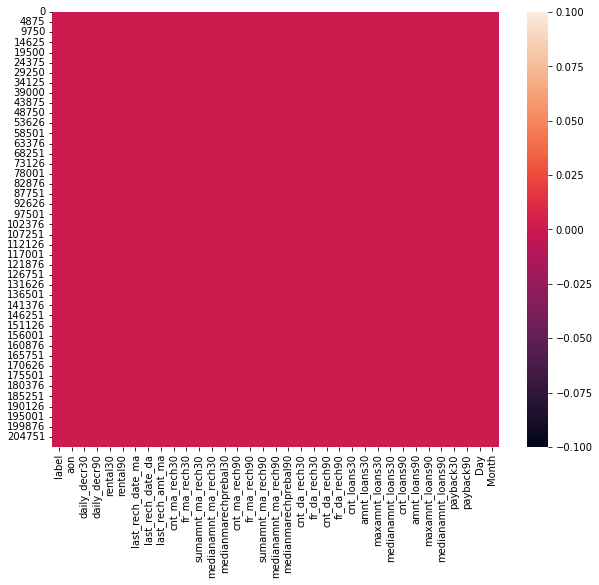

In [15]:
sns.set_palette('coolwarm')
plt.figure(figsize=(10,8))
sns.heatmap(df.isnull())
plt.show()

## Statistical

In [16]:
df.describe().T

count          mean           std           min  \
label                 209592.0      0.875177      0.330519      0.000000   
aon                   209592.0   8112.380399  75696.261220    -48.000000   
daily_decr30          209592.0   5381.412999   9220.644093    -93.012667   
daily_decr90          209592.0   6082.529123  10918.836919    -93.012667   
rental30              209592.0   2692.578912   4308.596841 -23737.140000   
rental90              209592.0   3483.407309   5770.475034 -24720.580000   
last_rech_date_ma     209592.0   3755.865715  53906.020204    -29.000000   
last_rech_date_da     209592.0   3712.220632  53374.960145    -29.000000   
last_rech_amt_ma      209592.0   2064.458973   2370.790003      0.000000   
cnt_ma_rech30         209592.0      3.978053      4.256099      0.000000   
fr_ma_rech30          209592.0   3737.372947  53643.752523      0.000000   
sumamnt_ma_rech30     209592.0   7704.496570  10139.645685      0.000000   
medianamnt_ma_rech30  209592.0   1812.819258   2070.869474      0.000000   
medianmarechprebal30  209592.0   3851.945862  54006.502647   -200.000000   
cnt_ma_rech90         209592.0      6.315437      7.193487      0.000000   
fr_ma_rech90          209592.0      7.716812     12.590273      0.000000   
sumamnt_ma_rech90     209592.0  12396.236149  16857.832129      0.000000   
medianamnt_ma_rech90  209592.0   1864.597375   2081.685508      0.000000   
medianmarechprebal90  209592.0     92.025522    369.216539   -200.000000   
cnt_da_rech30         209592.0    262.579362   4183.907920      0.000000   
fr_da_rech30          209592.0   3749.512336  53885.542905      0.000000   
cnt_da_rech90         209592.0      0.041495      0.397557      0.000000   
fr_da_rech90          209592.0      0.045713      0.951388      0.000000   
cnt_loans30           209592.0      2.758975      2.554507      0.000000   
amnt_loans30          209592.0     17.951992     17.379778      0.000000   
maxamnt_loans30       209592.0    274.660029   4245.274734      0.000000   
medianamnt_loans30    209592.0      0.054029      0.218039      0.000000   
cnt_loans90           209592.0     18.520988    224.797957      0.000000   
amnt_loans90          209592.0     23.645397     26.469924      0.000000   
maxamnt_loans90       209592.0      6.703138      2.103869      0.000000   
medianamnt_loans90    209592.0      0.046078      0.200692      0.000000   
payback30             209592.0      3.398639      8.813330      0.000000   
payback90             209592.0      4.321302     10.307791      0.000000   
Day                   209592.0     14.398899      8.438899      1.000000   
Month                 209592.0      6.797321      0.741437      6.000000   

                              25%          50%         75%            max  
label                    1.000000     1.000000      1.0000       1.000000  
aon                    246.000000   527.000000    982.0000  999860.755168  
daily_decr30            42.439500  1469.091833   7244.0960  265926.000000  
daily_decr90            42.691917  1500.000000   7802.7950  320630.000000  
rental30               280.417500  1083.540000   3356.9450  198926.110000  
rental90               300.260000  1334.000000   4201.7925  200148.110000  
last_rech_date_ma        1.000000     3.000000      7.0000  998650.377733  
last_rech_date_da        0.000000     0.000000      0.0000  999171.809410  
last_rech_amt_ma       770.000000  1539.000000   2309.0000   55000.000000  
cnt_ma_rech30            1.000000     3.000000      5.0000     203.000000  
fr_ma_rech30             0.000000     2.000000      6.0000  999606.368132  
sumamnt_ma_rech30     1540.000000  4628.000000  10010.0000  810096.000000  
medianamnt_ma_rech30   770.000000  1539.000000   1924.0000   55000.000000  
medianmarechprebal30    11.000000    33.900000     83.0000  999479.419319  
cnt_ma_rech90            2.000000     4.000000      8.0000     336.000000  
fr_ma_rech90             0.000000     2.000000      8.0000      88.00000

### Observation:
- For all features value of mean is greater than median, indicating skewness in features.
- All data belong to year 2016. We can drop year column.
- pcircle contain single unique value UPW, so we can drop this feature.
- The features aon, daily_decr30, daily_decr90 ,rental30, rental30, last_rech_date_ma, last_rech_date_da, cnt_da_rech30, fr_da_rech30, last_rech_amt_ma, maxamnt_loans30, cnt_loans90, payback30, payback90 contain outliers as there are lot difference in max columns and 75% columns.
- aon, daily_decr30, daily_decr90 ,rental30, rental30, last_rech_date_ma, last_rech_date_da, medianmarechprebal90, medianmarechprebal30 features contain negative values in minimum column.
- Maximum aon (age on cellular network in days) observed is 999860.755168 and the minimum is -48.

In [17]:
df.dtypes

label                     int64
aon                     float64
daily_decr30            float64
daily_decr90            float64
rental30                float64
rental90                float64
last_rech_date_ma       float64
last_rech_date_da       float64
last_rech_amt_ma          int64
cnt_ma_rech30             int64
fr_ma_rech30            float64
sumamnt_ma_rech30       float64
medianamnt_ma_rech30    float64
medianmarechprebal30    float64
cnt_ma_rech90             int64
fr_ma_rech90              int64
sumamnt_ma_rech90         int64
medianamnt_ma_rech90    float64
medianmarechprebal90    float64
cnt_da_rech30           float64
fr_da_rech30            float64
cnt_da_rech90             int64
fr_da_rech90              int64
cnt_loans30               int64
amnt_loans30              int64
maxamnt_loans30         float64
medianamnt_loans30      float64
cnt_loans90             float64
amnt_loans90              int64
maxamnt_loans90           int64
medianamnt_loans90      float64
payback3

In [18]:
df.nunique()

label                        2
aon                       4507
daily_decr30            147025
daily_decr90            158669
rental30                132148
rental90                141033
last_rech_date_ma         1186
last_rech_date_da         1174
last_rech_amt_ma            70
cnt_ma_rech30               71
fr_ma_rech30              1083
sumamnt_ma_rech30        15141
medianamnt_ma_rech30       510
medianmarechprebal30     30428
cnt_ma_rech90              110
fr_ma_rech90                89
sumamnt_ma_rech90        31771
medianamnt_ma_rech90       608
medianmarechprebal90     29785
cnt_da_rech30             1066
fr_da_rech30              1072
cnt_da_rech90               27
fr_da_rech90                46
cnt_loans30                 40
amnt_loans30                48
maxamnt_loans30           1050
medianamnt_loans30           6
cnt_loans90               1110
amnt_loans90                69
maxamnt_loans90              3
medianamnt_loans90           6
payback30                 1363
payback9

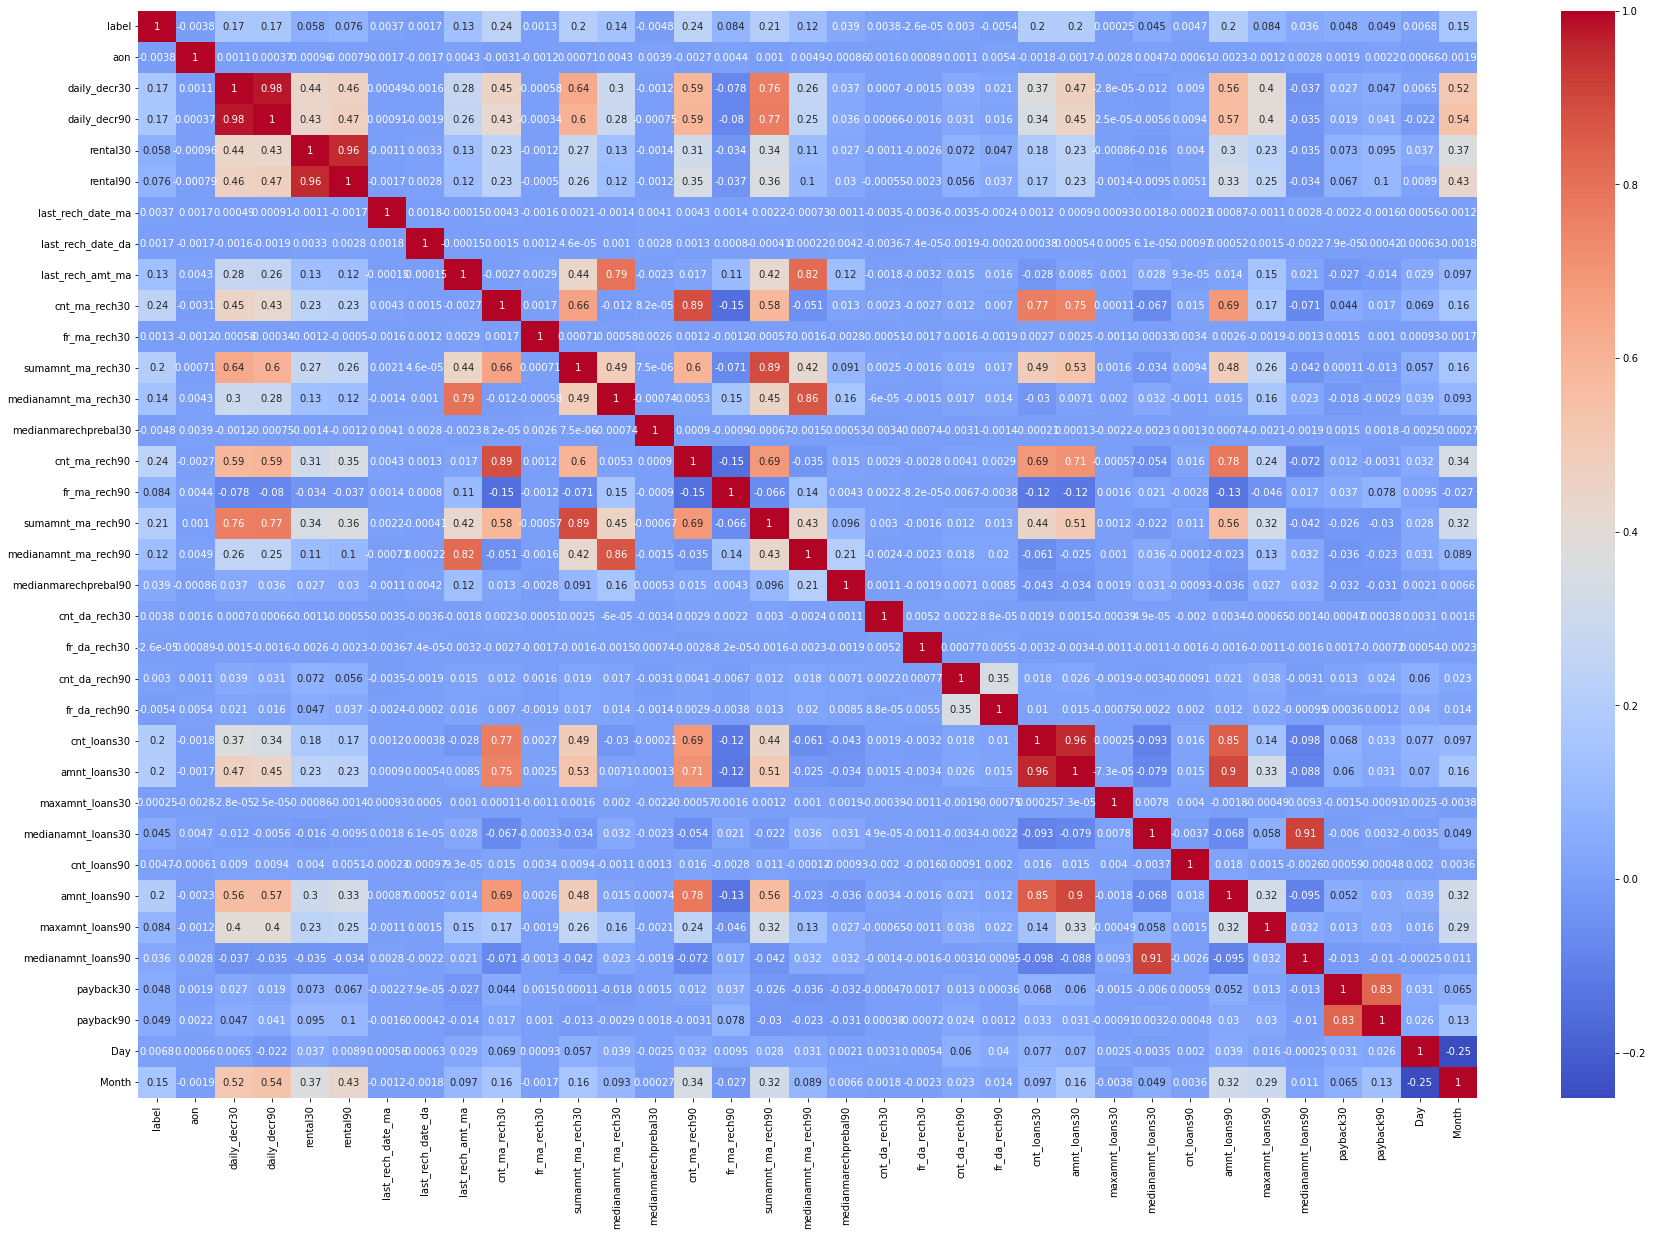

In [19]:
plt.figure(figsize=(30,20))
sns.heatmap(df.corr(),annot = True,cmap='coolwarm');

#### Key Observations:

- From above we can observe that "cnt_ma_rech30", "cnt_ma_rech90", "sumamnt_ma_rech90", "sumamnt_ma_rech30" have more corelation with the Target variable "label". Lets visualize the feature variable correlation with target variable seprately.
- 'daily_decr30', 'daily_decr90', 'rental30', 'rental90','last_rech_amt_ma','cnt_ma_rech30','sumamnt_ma_rech90', 'medianamnt_ma_rech90', 'cnt_loans30', 'amnt_loans30', 'amnt_loans90', 'maxamnt_loans90', payback30, payback90, pdate_day, pdate_month have more correlation with each other which is these variables are dependent on each other.

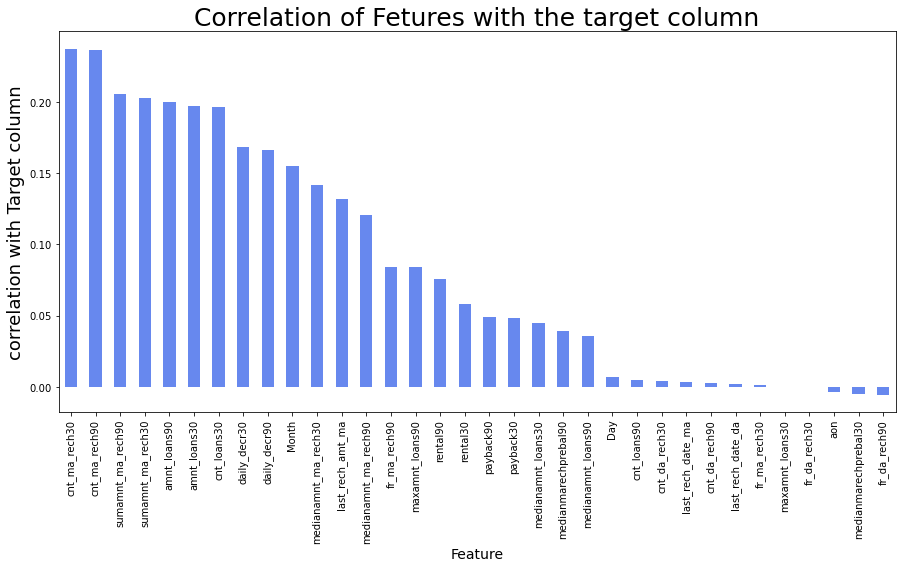

KEY OBSERVATIONS:
 


label
cnt_ma_rech30         0.237331
cnt_ma_rech90         0.236393
sumamnt_ma_rech90     0.205794
sumamnt_ma_rech30     0.202828
amnt_loans90          0.199788
amnt_loans30          0.197272
cnt_loans30           0.196283
daily_decr30          0.168298
daily_decr90          0.166151
Month                 0.154948
medianamnt_ma_rech30  0.141491
last_rech_amt_ma      0.131805
medianamnt_ma_rech90  0.120855
fr_ma_rech90          0.084386
maxamnt_loans90       0.084144
rental90              0.075521
rental30              0.058084
payback90             0.049178
payback30             0.048330
medianamnt_loans30    0.044590
medianmarechprebal90  0.039300
medianamnt_loans90    0.035747
Day                   0.006824
cnt_loans90           0.004733
cnt_da_rech30         0.003827
last_rech_date_ma     0.003728
cnt_da_rech90         0.002999
last_rech_date_da     0.001711
fr_ma_rech30          0.001330
maxamnt_loans30       0.000248
fr_da_rech30         -0.000026
aon                  -0.003785
medianmarechprebal30 -0.004829
fr_da_rech90         -0.005418

In [20]:
plt.figure(figsize=(15,7))
df.corr()["label"].sort_values(ascending=False).drop(["label"]).plot.bar()
plt.xlabel("Feature", fontsize= 14)
plt.ylabel("correlation with Target column", fontsize = 18)
plt.title("Correlation of Fetures with the target column", fontsize=25)
plt.show()
cor=pd.DataFrame(df.corr()["label"].sort_values(ascending=False)).drop(["label"])
print("KEY OBSERVATIONS:\n ")
cor

In [22]:
col_List = df.columns.values
col_List = np.delete(col_List, [0, 33, 34])
col_List

array(['aon', 'daily_decr30', 'daily_decr90', 'rental30', 'rental90',
       'last_rech_date_ma', 'last_rech_date_da', 'last_rech_amt_ma',
       'cnt_ma_rech30', 'fr_ma_rech30', 'sumamnt_ma_rech30',
       'medianamnt_ma_rech30', 'medianmarechprebal30', 'cnt_ma_rech90',
       'fr_ma_rech90', 'sumamnt_ma_rech90', 'medianamnt_ma_rech90',
       'medianmarechprebal90', 'cnt_da_rech30', 'fr_da_rech30',
       'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30', 'amnt_loans30',
       'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90',
       'amnt_loans90', 'maxamnt_loans90', 'medianamnt_loans90',
       'payback30', 'payback90'], dtype=object)

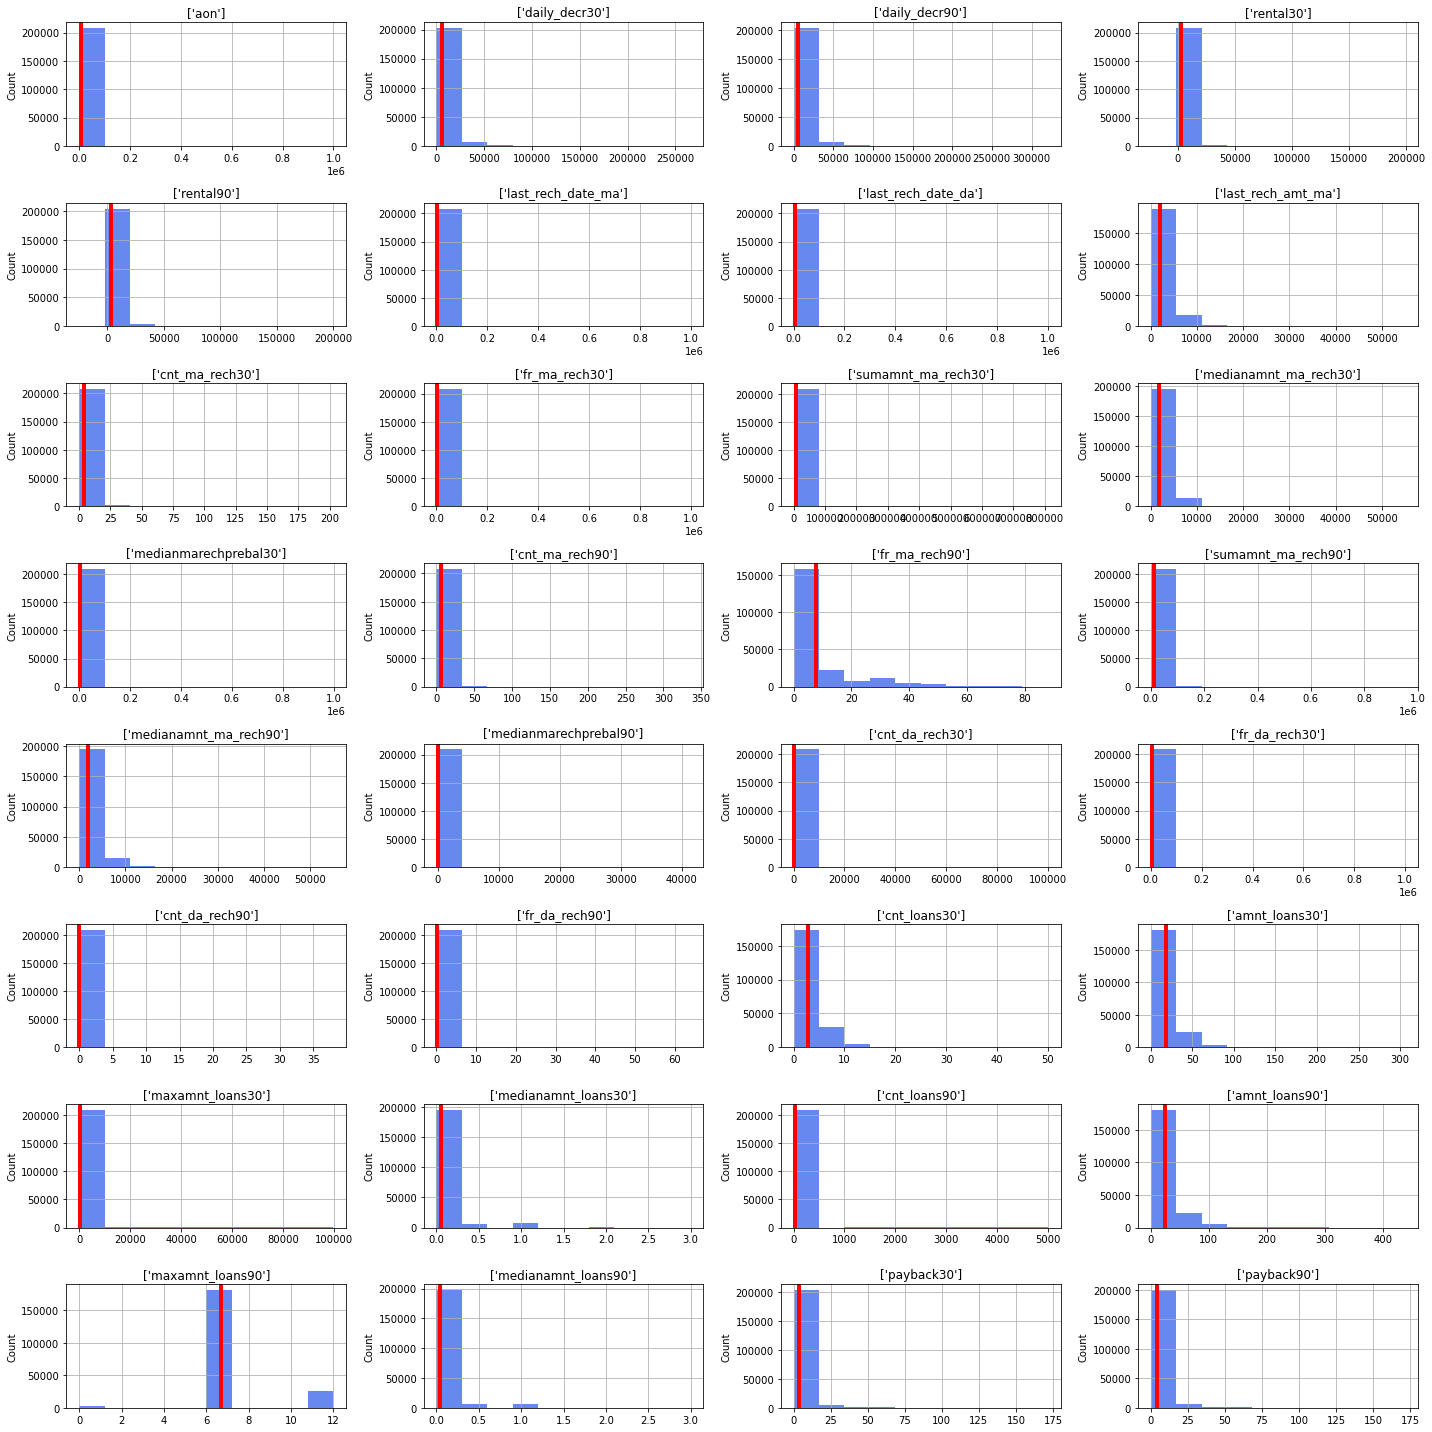

In [23]:
plt.figure(figsize=(20,20))

for i in range(0,len(col_List)):
    plt.subplot(8,4,i+1)
    df[col_List[i]].hist()
    mean = np.mean(df[col_List[i]])
    plt.axvline(mean, linewidth = 4, color = 'red', label = df[col_List[i]])
    plt.title(f"{[col_List[i]]}")
    plt.ylabel('Count')
    plt.tight_layout()

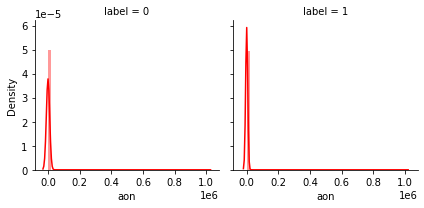

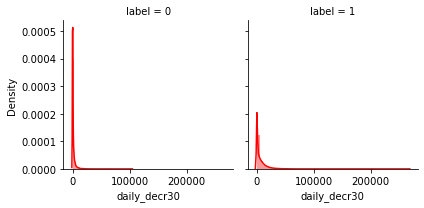

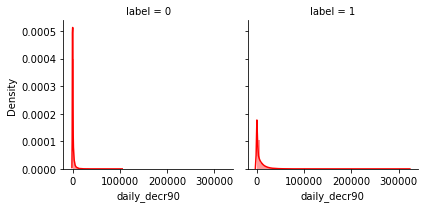

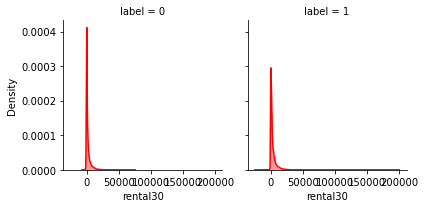

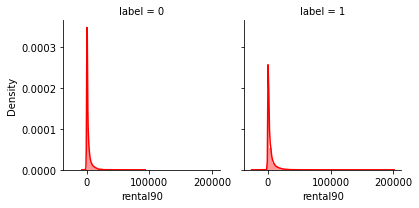

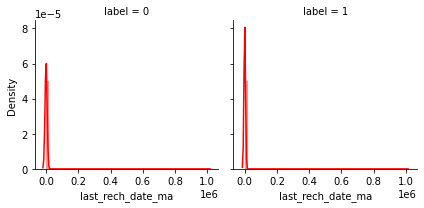

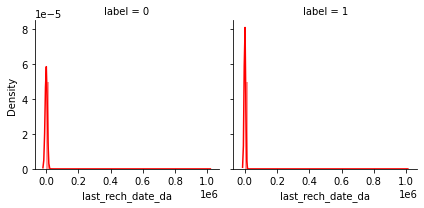

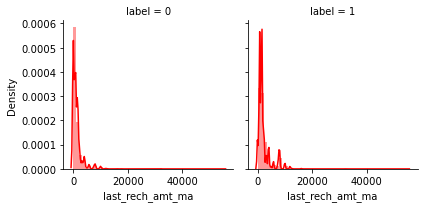

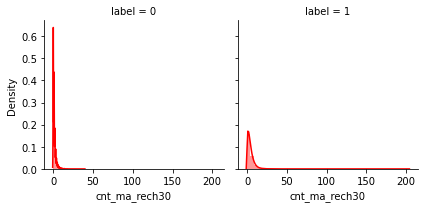

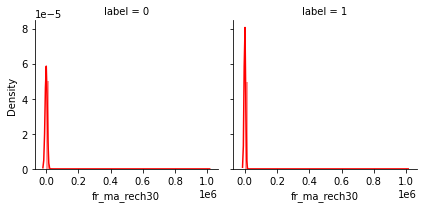

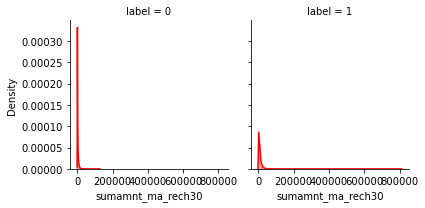

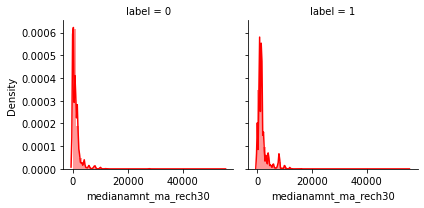

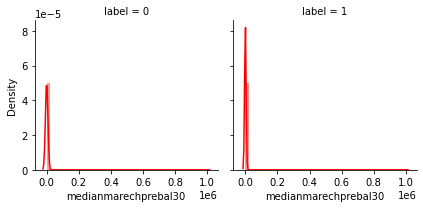

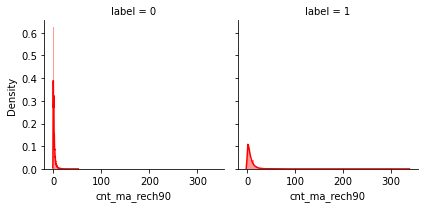

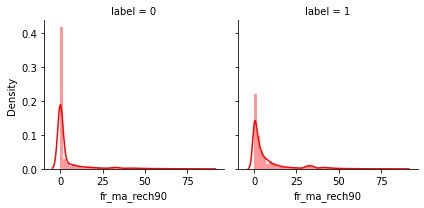

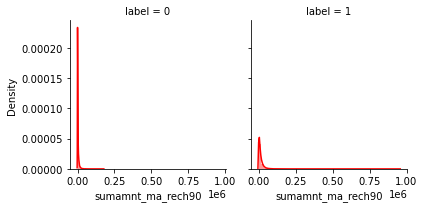

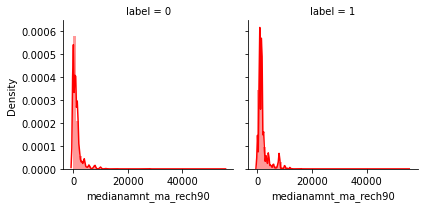

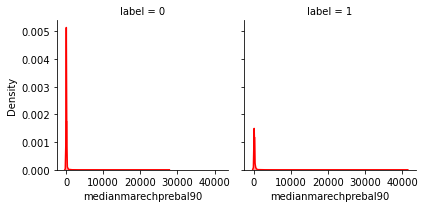

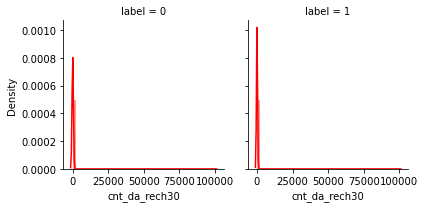

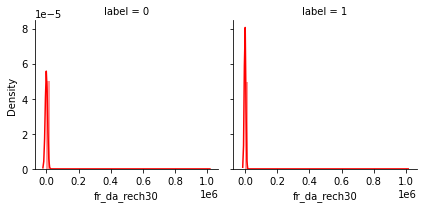

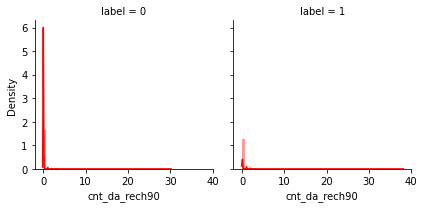

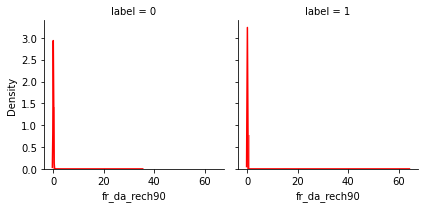

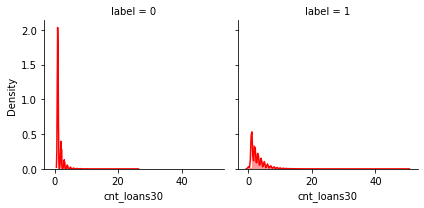

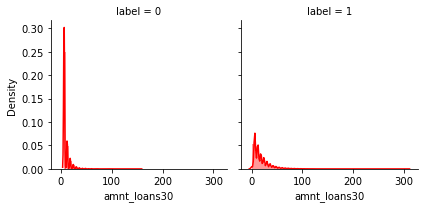

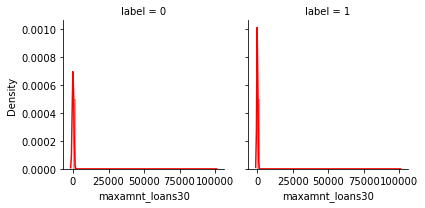

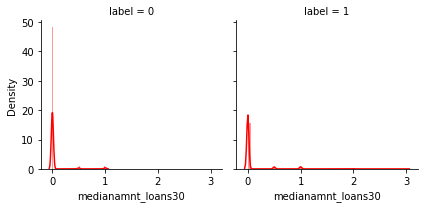

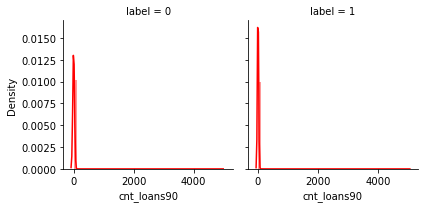

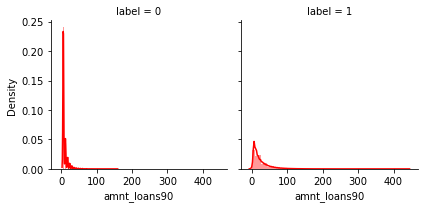

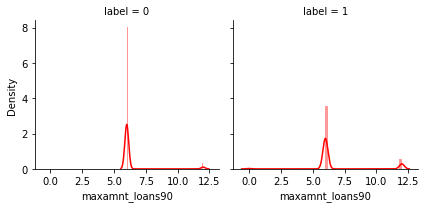

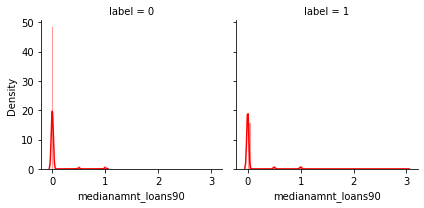

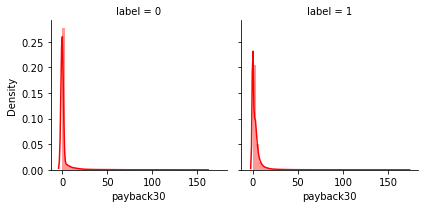

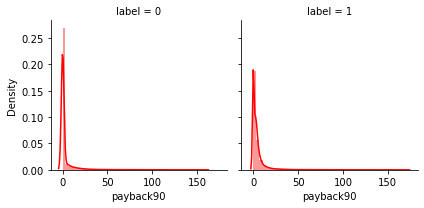

In [24]:
for i in col_List:
    facet= sns.FacetGrid(df,col="label")
    facet.map(sns.distplot,i,color = "red")
    plt.show()

<Figure size 1080x576 with 0 Axes>

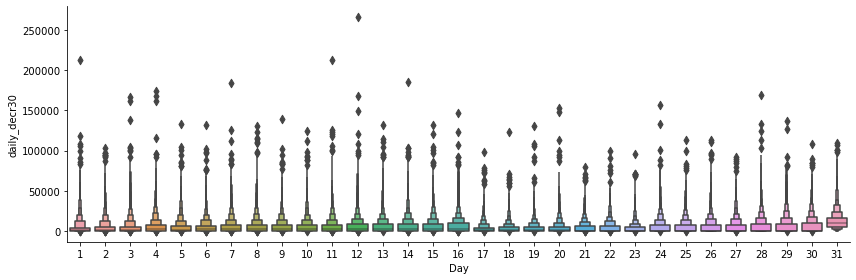

In [25]:
plt.figure(figsize=(15,8))
sns.catplot(y = "daily_decr30", x = "Day", data = df.sort_values("daily_decr30", ascending = False),
            kind="boxen", height = 4, aspect = 3)
plt.show()

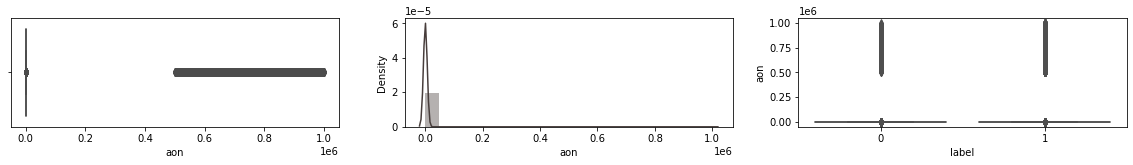

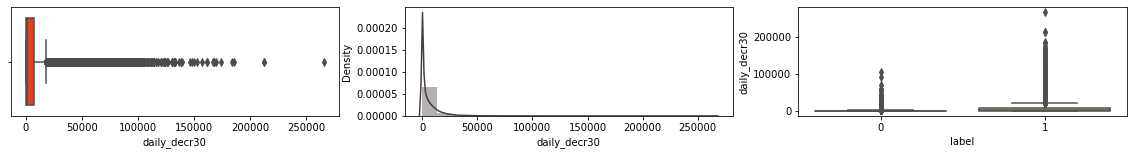

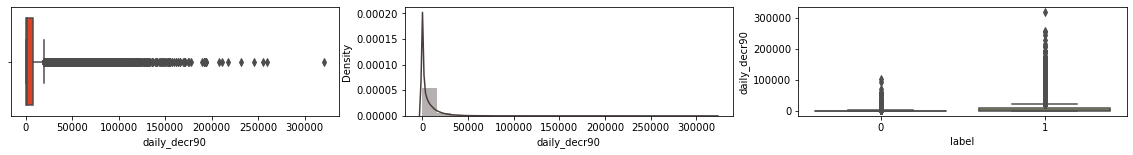

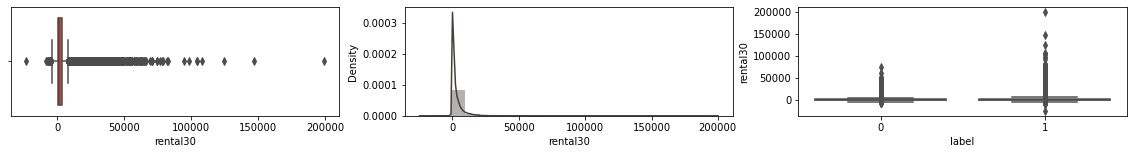

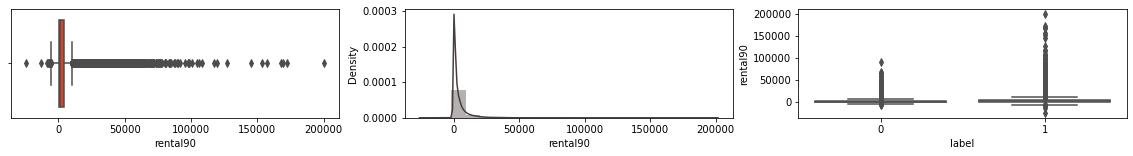

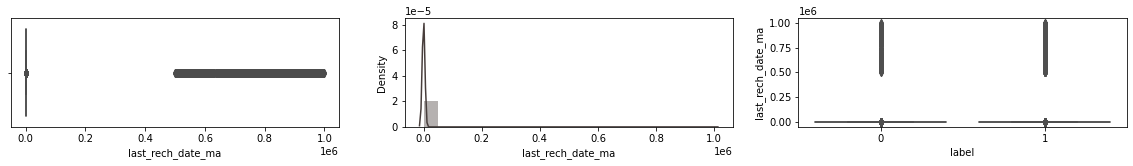

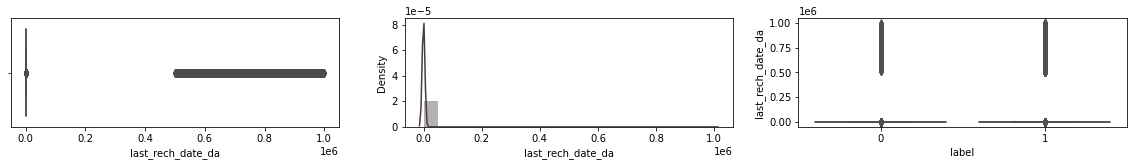

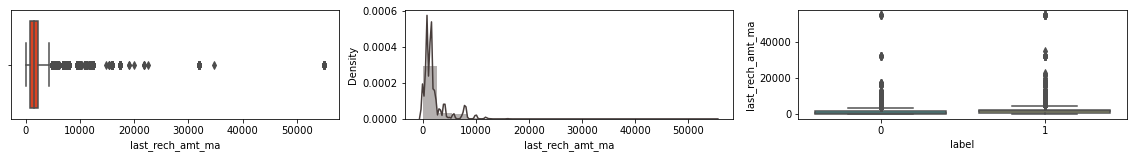

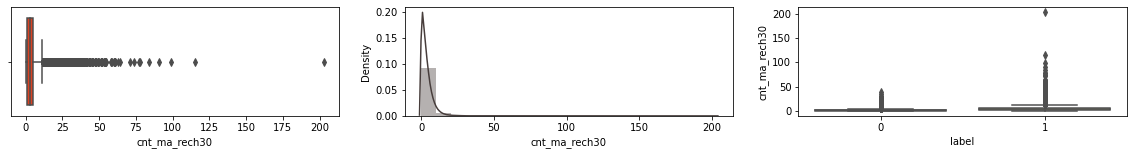

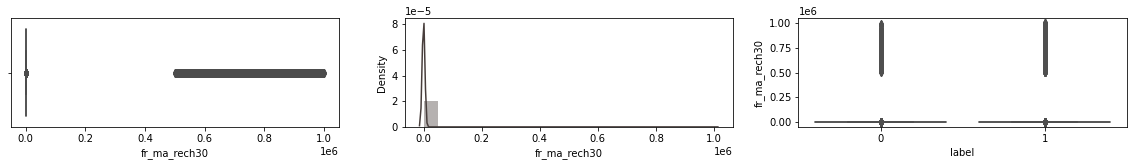

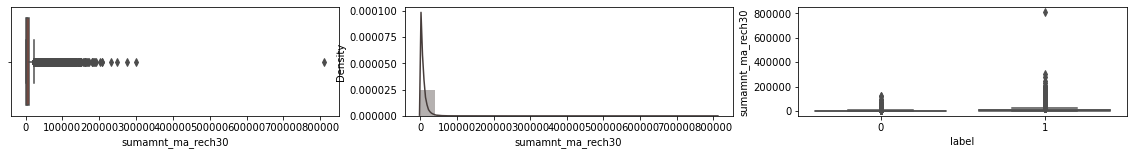

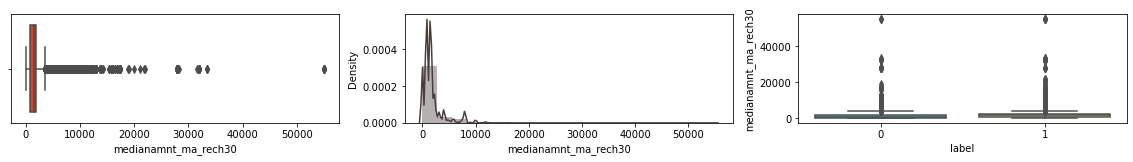

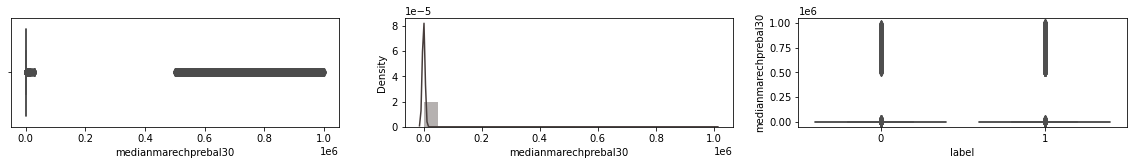

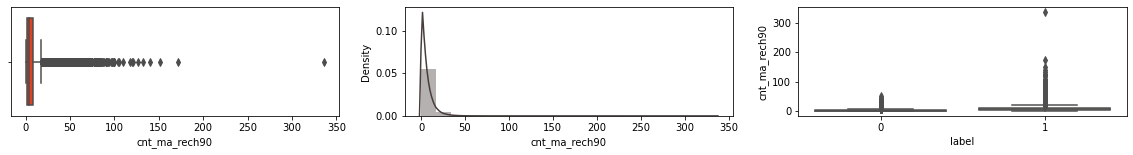

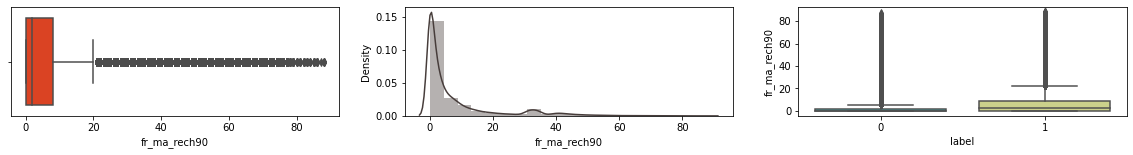

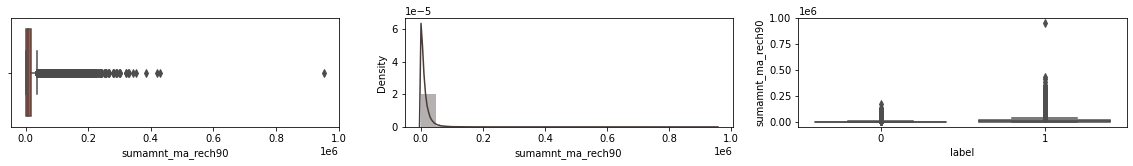

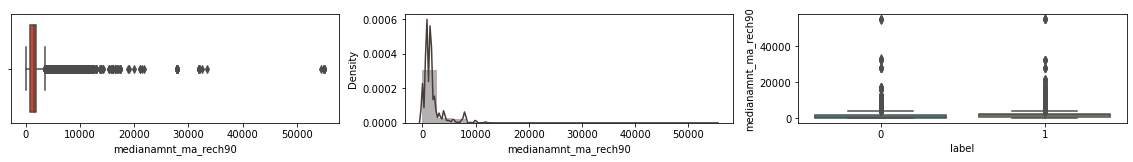

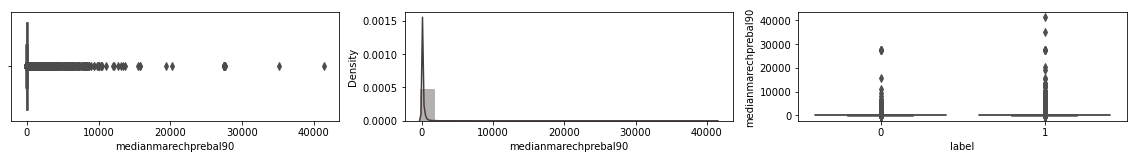

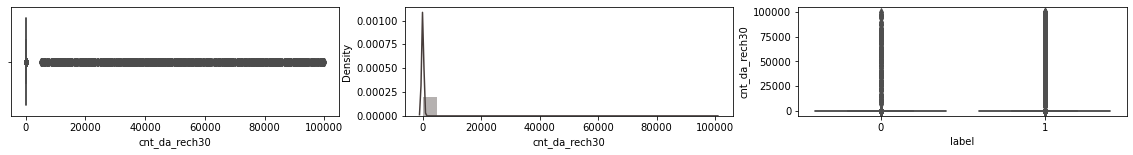

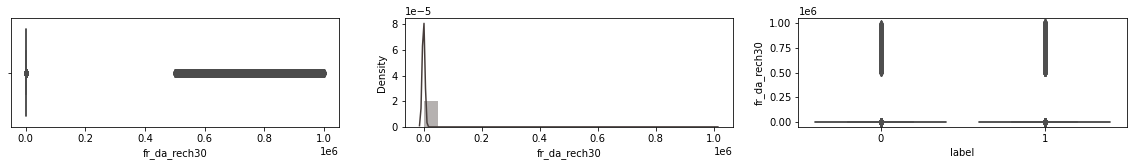

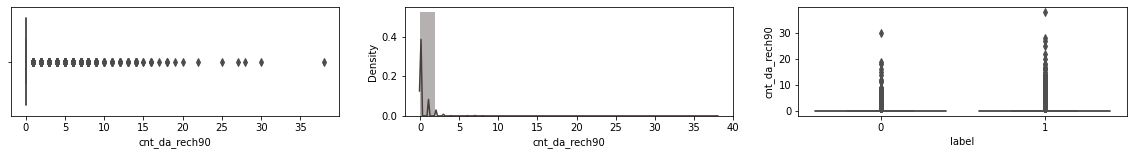

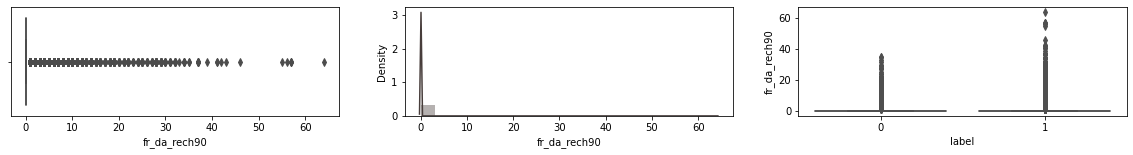

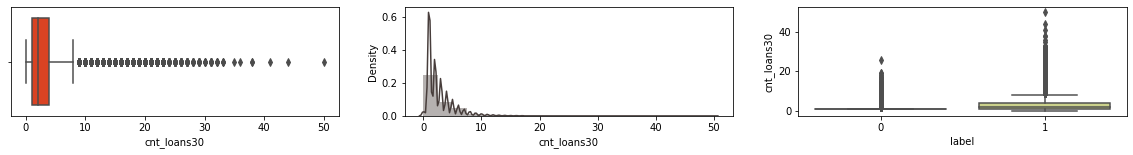

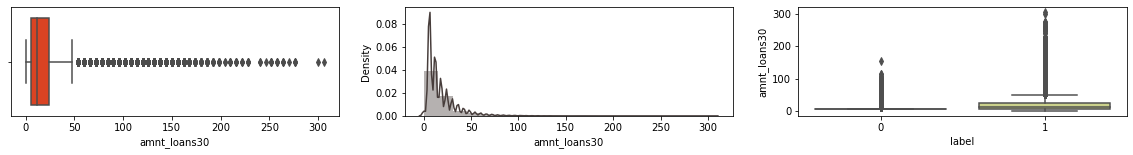

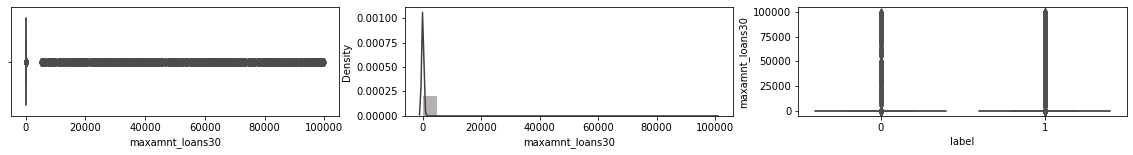

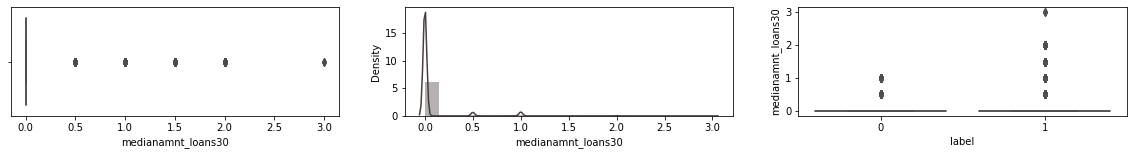

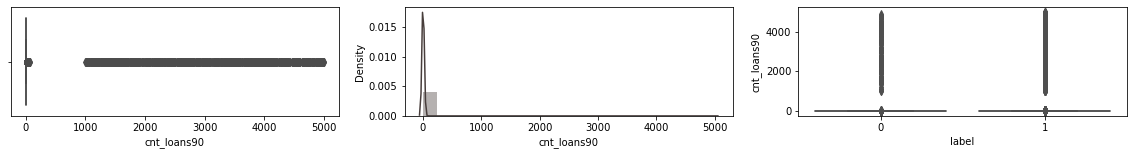

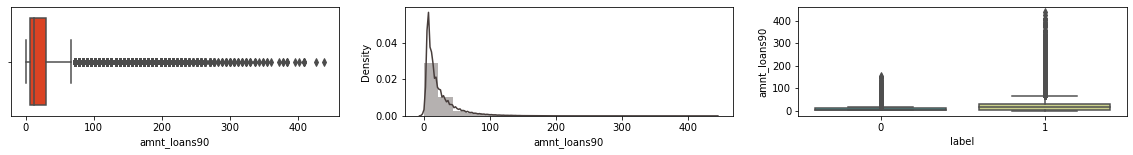

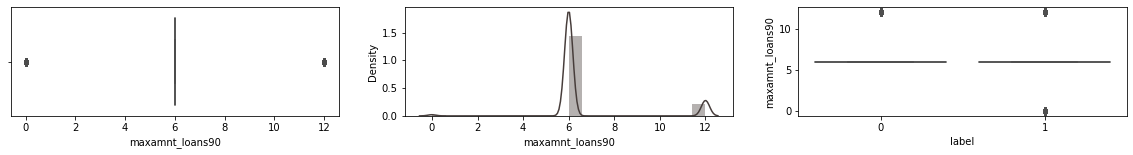

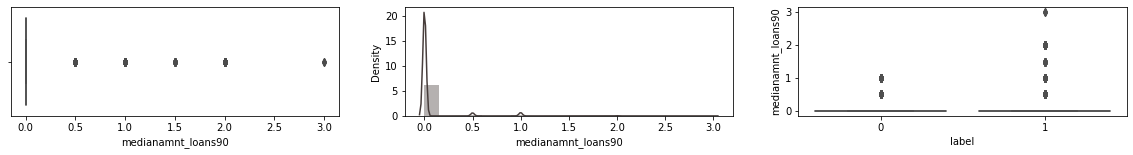

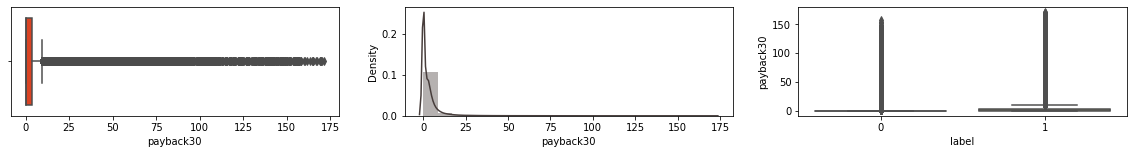

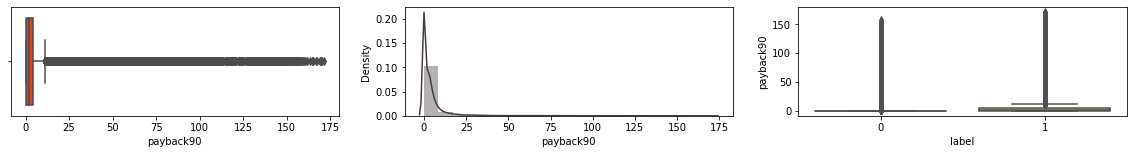

In [26]:
target_var = 'label'
feature_var = ['aon', 'daily_decr30', 'daily_decr90', 'rental30', 'rental90',
       'last_rech_date_ma', 'last_rech_date_da', 'last_rech_amt_ma',
       'cnt_ma_rech30', 'fr_ma_rech30', 'sumamnt_ma_rech30',
       'medianamnt_ma_rech30', 'medianmarechprebal30', 'cnt_ma_rech90',
       'fr_ma_rech90', 'sumamnt_ma_rech90', 'medianamnt_ma_rech90',
       'medianmarechprebal90', 'cnt_da_rech30', 'fr_da_rech30',
       'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30', 'amnt_loans30',
       'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90',
       'amnt_loans90', 'maxamnt_loans90', 'medianamnt_loans90',
       'payback30', 'payback90']


def num_plots(feature_name):
    fig, axs = plt.subplots(1, 3, figsize=(20, 2))
    a1=sns.boxplot(x=df[feature_name], ax=axs[0], color="#f82f04")
    
    a2=sns.distplot(df[feature_name], bins=20, kde=True, ax=axs[1],color="#473d3b")
        
    a3=sns.boxplot(x = target_var, y = feature_name, data = df, ax=axs[2], palette = "rainbow")
        
    plt.show()
    
   
for i in feature_var:
    num_plots(i)

##### Key Observations:
1. We can observe the Data have to many outliers and skewness.
2. We can also see that as mentioned above how the Feature variable is contributing for target variable.
3. Lets seprately visualize skewness and outliers  and lets figure out the way to remove them without much loss in data.

### Visualizing Skewness

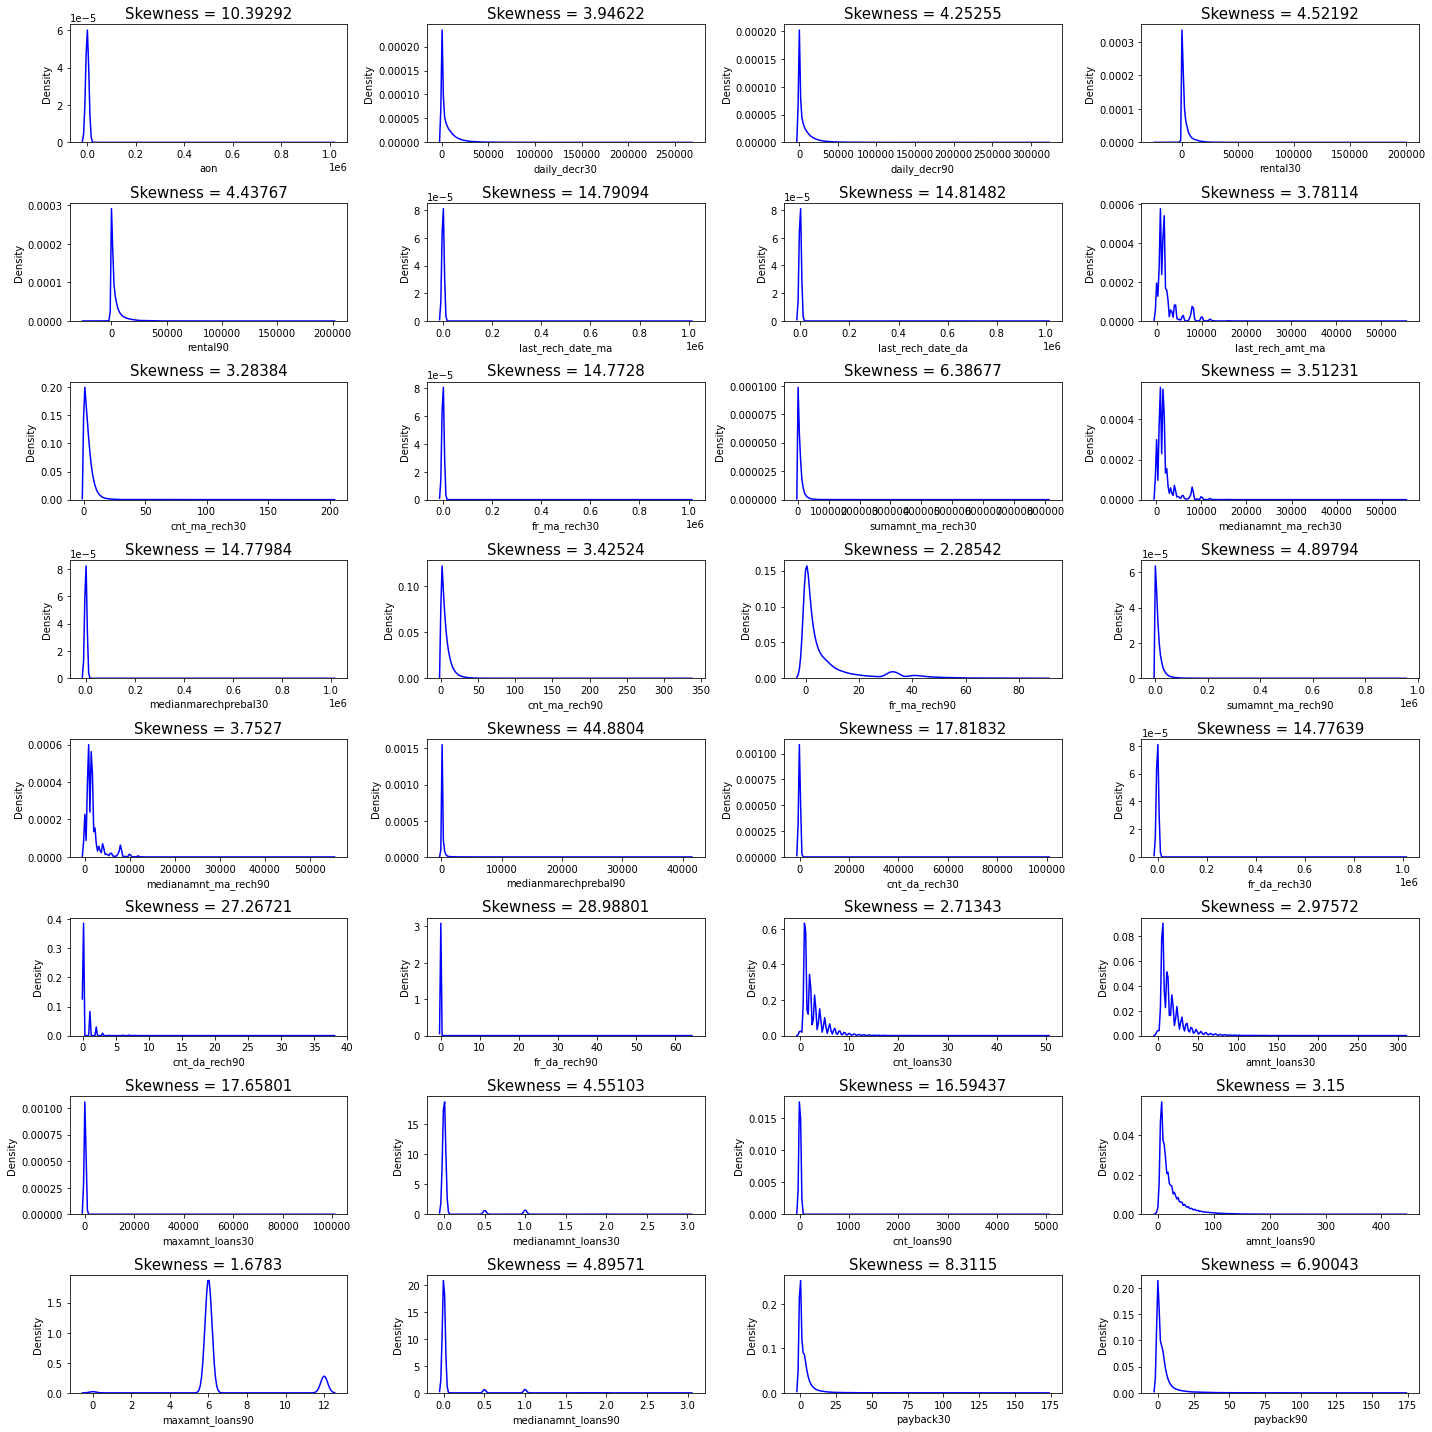

In [27]:
plt.figure(figsize=(20,20))

for i in range (0, len(col_List)):
    plt.subplot(8,4,i+1)         
    sns.kdeplot(df[col_List[i]], color = 'b')
    plt.title(f"Skewness = {round(df[col_List[i]].skew(),5)}",fontsize=15)
    plt.tight_layout()

We can see that the data have too much skewness we will remove them by Power-transformation yoeJohnson method but before which we will visualize outliers and figure out a method to remove them without much loss in data.

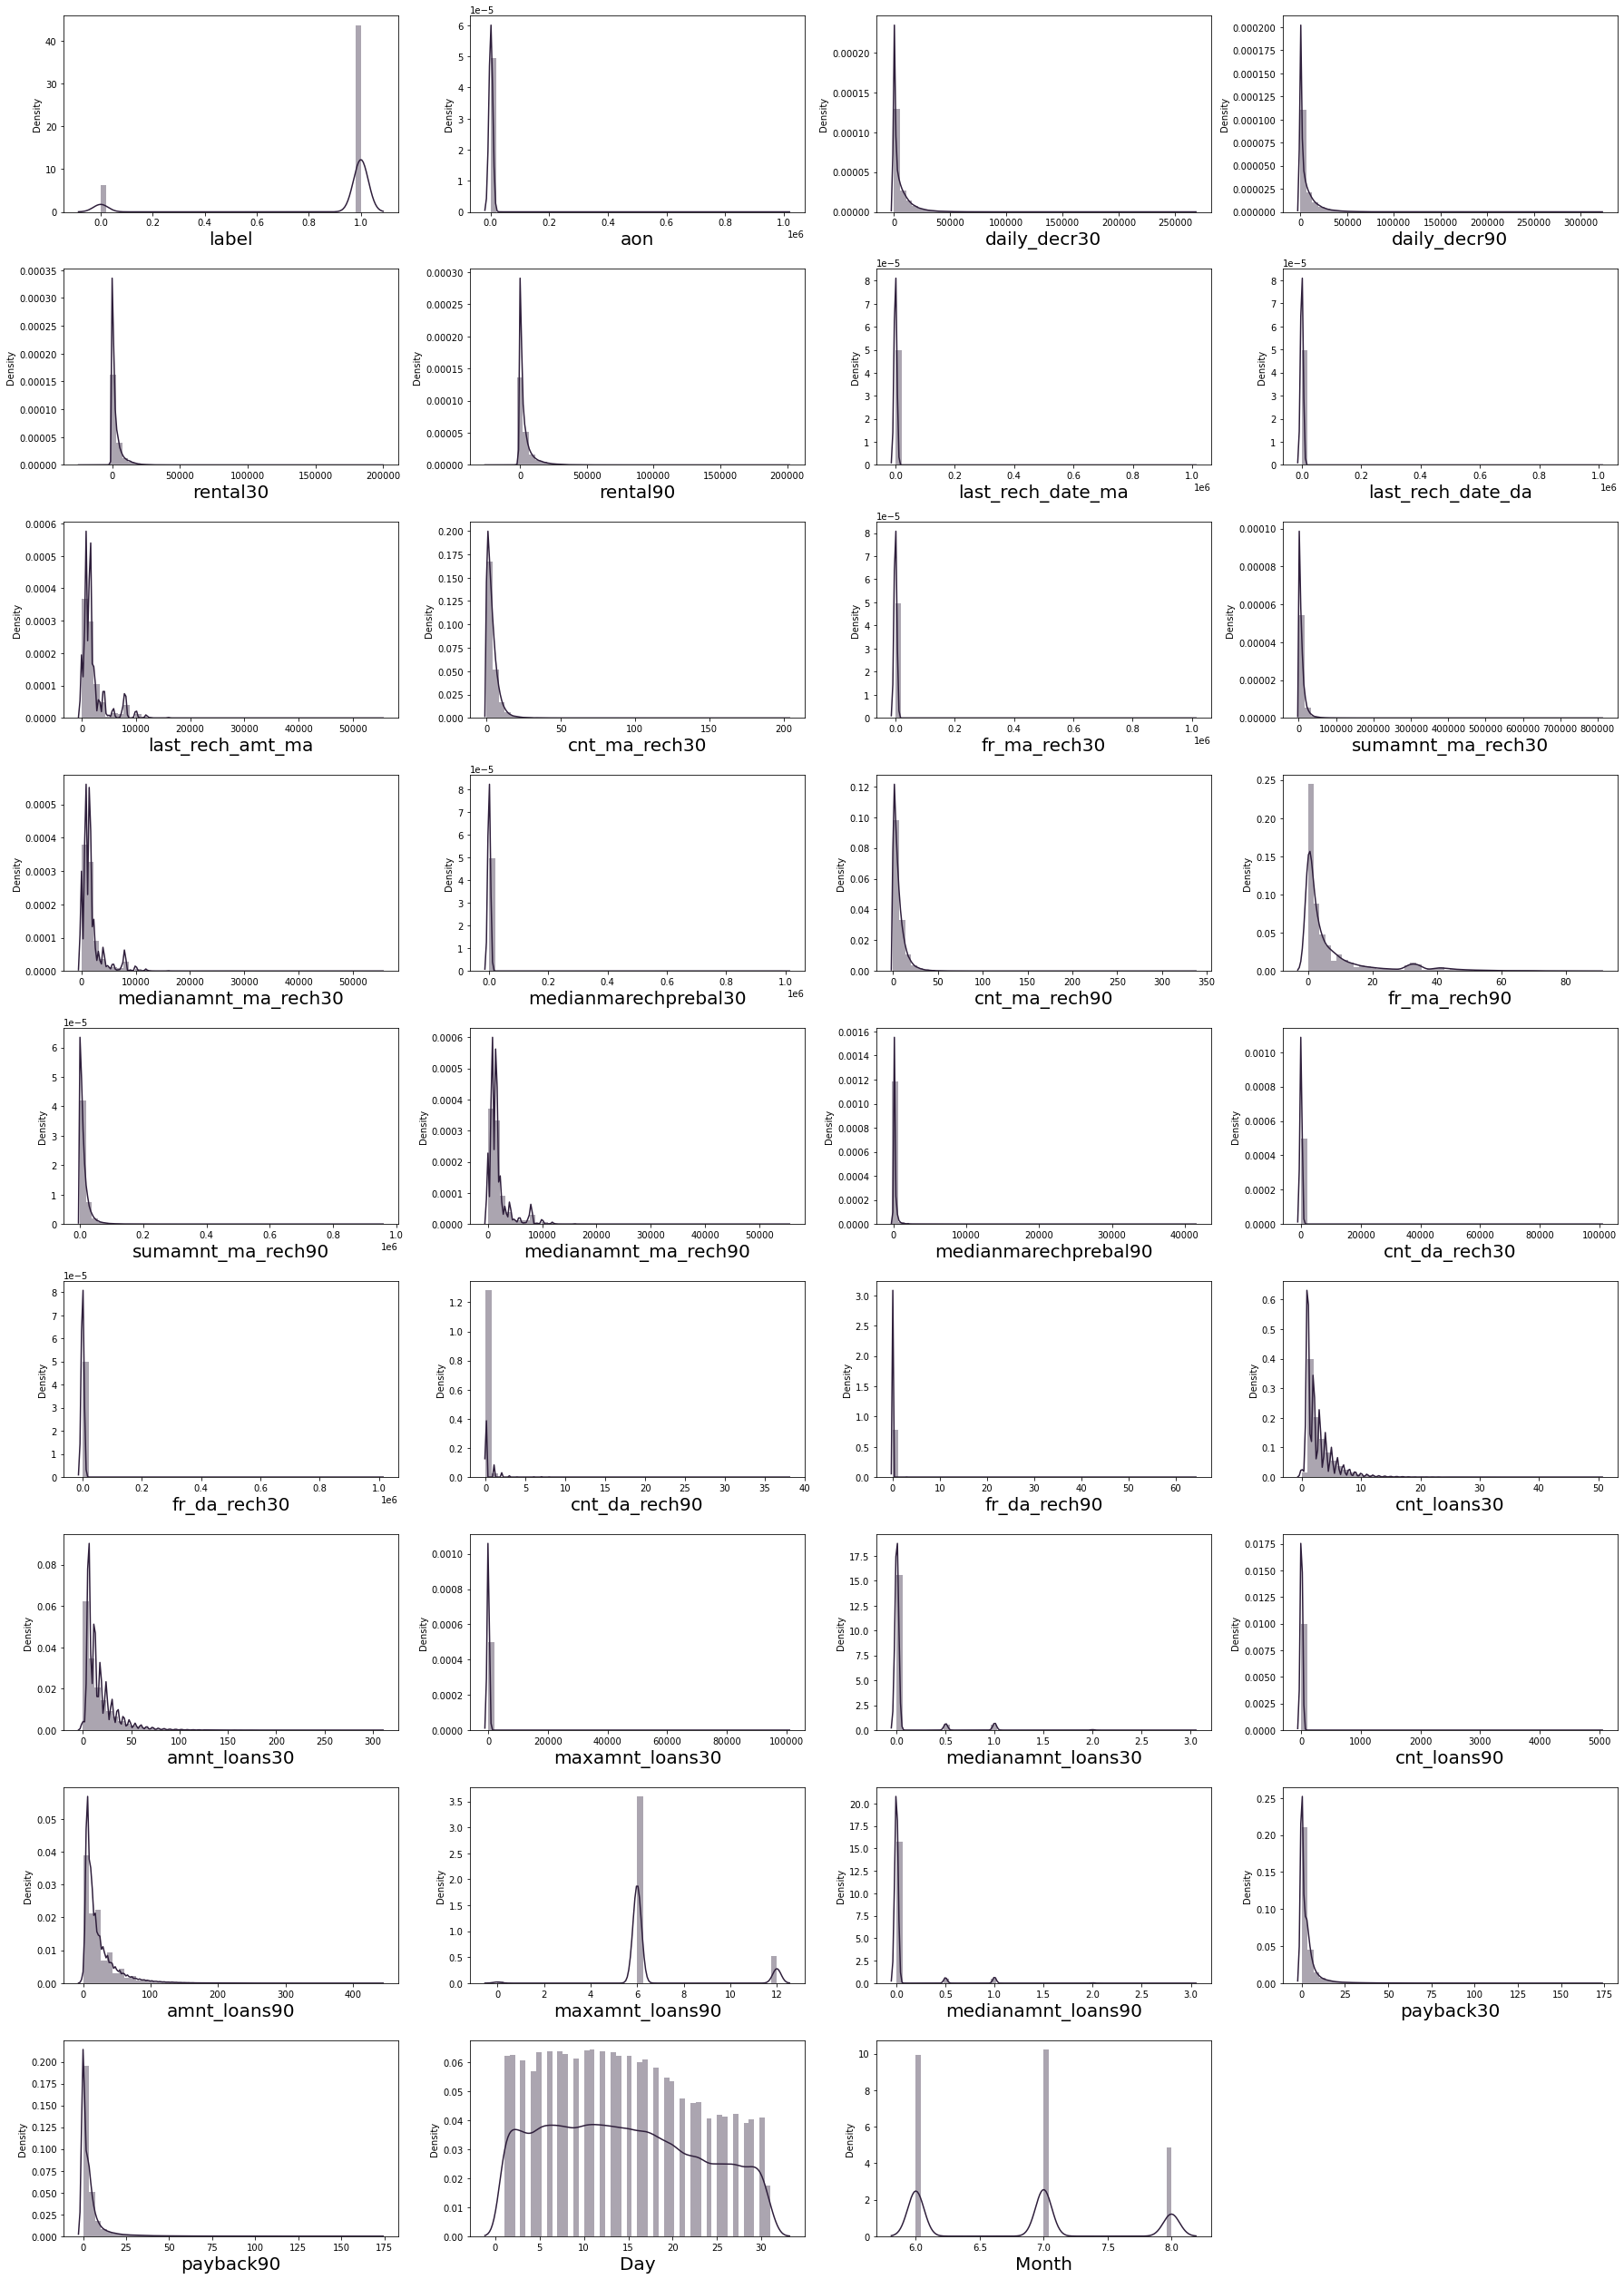

In [28]:
plt.figure(figsize=(25,35),facecolor='white')
plotnumber=1
sns.set_palette('mako')
for column in df:
    if plotnumber<=36:
        ax=plt.subplot(9,4,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()
plt.show()

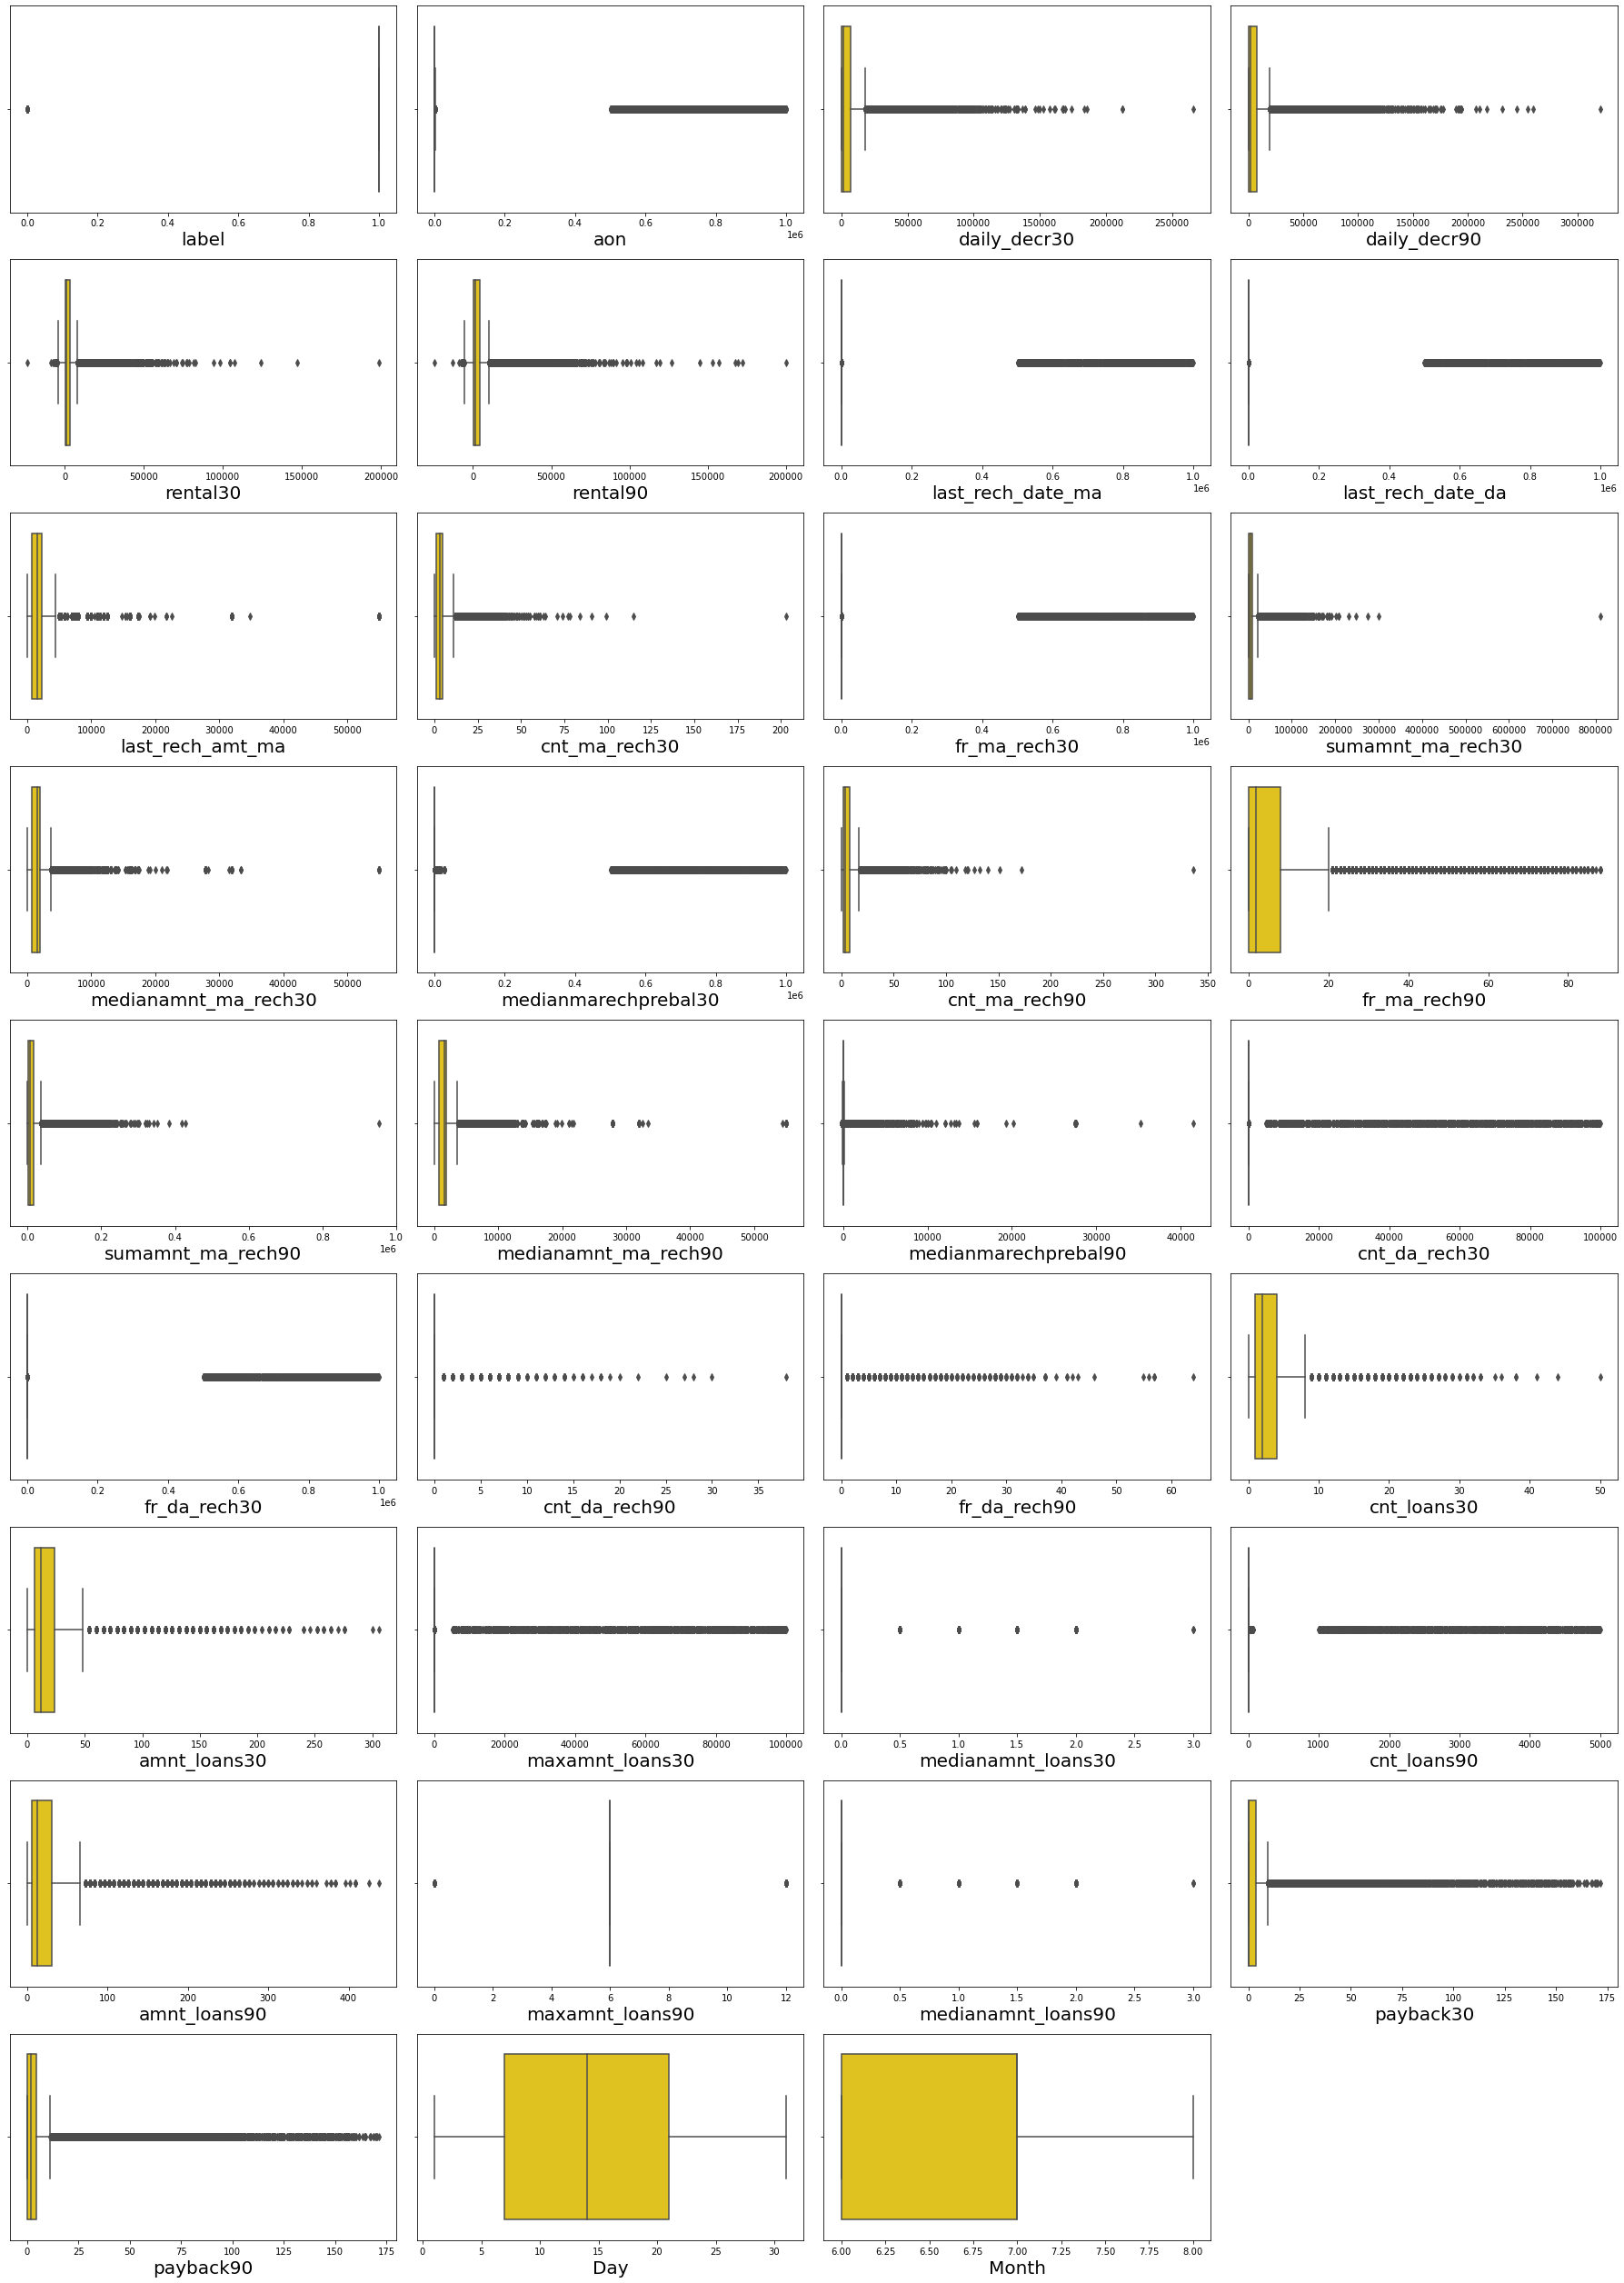

In [29]:
plt.figure(figsize=(25,35),facecolor='white')
plotnumber=1

for column in df:
    if plotnumber<=36:
        ax=plt.subplot(9,4,plotnumber)
        sns.boxplot(df[column],color='gold')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()
plt.show()

### Removing Outliers

In [30]:
from scipy.stats import zscore
z= np.abs(zscore(df))
threshold= 3
new_df = df[(z < 3).all(axis=1)]

In [31]:
df.shape

(209592, 35)

In [32]:
new_df.shape

(161465, 35)

In [33]:
Q1=df.quantile(0.25)
Q3=df.quantile(0.75)
IQR=Q3-Q1

new_df1=df[~((df<(Q1-1.5*IQR))|(df>(Q3+1.5*IQR))).any(axis=1)]

In [34]:
new_df1.shape

(56628, 35)

The loss of data is extemely high when outliers is removed so we have to train our model with outliers present in the data.

### Checking skewness in the data

In [35]:
new_df.skew().sort_values()

label                   -2.090315
fr_da_rech90             0.000000
fr_da_rech30             0.000000
Day                      0.190598
Month                    0.475720
aon                      0.957902
cnt_ma_rech30            1.175157
cnt_ma_rech90            1.321145
amnt_loans30             1.441450
cnt_loans30              1.465414
sumamnt_ma_rech30        1.634226
amnt_loans90             1.695156
sumamnt_ma_rech90        1.707309
cnt_loans90              1.708977
daily_decr30             1.963747
fr_ma_rech90             1.985567
fr_ma_rech30             2.005139
daily_decr90             2.077637
last_rech_amt_ma         2.125356
rental30                 2.194889
rental90                 2.244866
medianamnt_ma_rech30     2.326312
medianamnt_ma_rech90     2.373140
payback90                2.532647
payback30                2.612633
maxamnt_loans90          2.680929
last_rech_date_ma        3.099484
medianmarechprebal90     3.692650
medianamnt_loans30       5.355423
medianamnt_loa

### Correlation

In [36]:
cor = new_df.corr()
cor

label       aon  daily_decr30  daily_decr90  \
label                 1.000000  0.086376      0.191662      0.192073   
aon                   0.086376  1.000000      0.071687      0.073848   
daily_decr30          0.191662  0.071687      1.000000      0.979246   
daily_decr90          0.192073  0.073848      0.979246      1.000000   
rental30              0.048945  0.052519      0.445846      0.433199   
rental90              0.069545  0.057465      0.495649      0.504950   
last_rech_date_ma    -0.095769  0.015165     -0.046021     -0.040094   
last_rech_date_da     0.026123 -0.000733      0.058444      0.060433   
last_rech_amt_ma      0.159589  0.081721      0.257911      0.247432   
cnt_ma_rech30         0.292492  0.015264      0.396178      0.373330   
fr_ma_rech30          0.165446  0.044654      0.108481      0.111613   
sumamnt_ma_rech30     0.270259  0.056602      0.517794      0.486043   
medianamnt_ma_rech30  0.171223  0.084110      0.269856      0.258592   
medianmarechprebal30  0.117063  0.022863      0.089511      0.089299   
cnt_ma_rech90         0.293923  0.038716      0.583050      0.589801   
fr_ma_rech90          0.125260  0.043040     -0.029171     -0.029700   
sumamnt_ma_rech90     0.272042  0.078466      0.697876      0.702235   
medianamnt_ma_rech90  0.148804  0.088960      0.230617      0.224029   
medianmarechprebal90  0.124172  0.019193      0.047657      0.045234   
cnt_da_rech30         0.000279 -0.004037     -0.002282     -0.002404   
fr_da_rech30               NaN       NaN           NaN           NaN   
cnt_da_rech90         0.025171  0.011916      0.029741      0.028733   
fr_da_rech90               NaN       NaN           NaN           NaN   
cnt_loans30           0.238983  0.049552      0.328738      0.303358   
amnt_loans30          0.244307  0.052399      0.420826      0.396451   
maxamnt_loans30       0.002689  0.002055      0.003933      0.003916   
medianamnt_loans30    0.040130  0.000348      0.010631      0.013181   
cnt_loans90           0.244240  0.082985      0.514988      0.517802   
amnt_loans90          0.246878  0.083288      0.570296      0.573994   
maxamnt_loans90       0.088565  0.029714      0.434206      0.436362   
medianamnt_loans90    0.029620 -0.004733     -0.027961     -0.028166   
payback30             0.142282  0.021474      0.148301      0.139665   
payback90             0.141053  0.041227      0.194491      0.190416   
Day                   0.011526  0.013302      0.032657      0.002120   
Month                 0.139512  0.064493      0.613791      0.642152   

                      rental30  rental90  last_rech_date_ma  \
label                 0.048945  0.069545          -0.095769   
aon                   0.052519  0.057465           0.015165   
daily_decr30          0.445846  0.495649          -0.046021   
daily_decr90          0.433199  0.504950          -0.040094   
rental30              1.000000  0.950336          -0.017986   
rental90              0.950336  1.000000          -0.005881   
last_rech_date_ma    -0.017986 -0.005881           1.000000   
last_rech_date_da     0.011158  0.019024           0.025265   
last_rech_amt_ma      0.089045  0.090056           0.230253   
cnt_ma_rech30         0.237642  0.233016          -0.246814   
fr_ma_rech30          0.070310  0.080419          -0.144294   
sumamnt_ma_rech30     0.251540  0.242117          -0.164319   
medianamnt_ma_rech30  0.091594  0.090687           0.032274   
medianmarechprebal30  0.025976  0.031934          -0.005077   
cnt_ma_rech90         0.325945  0.369840          -0.160966   
fr_ma_rech90         -0.018376 -0.019041          -0.005486   
sumamnt_ma_rech90     0.329694  0.367041          -0.078957   
medianamnt_ma_rech90  0.069448  0.069033           0.218842   
medianmarechprebal90 -0.003297 -0.002985           0.077618   
cnt_da_rech30        -0.005004 -0.004930          -0.000481   
fr_da_rech30               NaN       NaN                NaN   
cnt_da_rech90        -0.003383 -0.001846      

In [37]:
new_df.drop(["fr_da_rech90","fr_da_rech30"], axis =1, inplace = True)

In [38]:
cor = new_df.corr()
cor

label       aon  daily_decr30  daily_decr90  \
label                 1.000000  0.086376      0.191662      0.192073   
aon                   0.086376  1.000000      0.071687      0.073848   
daily_decr30          0.191662  0.071687      1.000000      0.979246   
daily_decr90          0.192073  0.073848      0.979246      1.000000   
rental30              0.048945  0.052519      0.445846      0.433199   
rental90              0.069545  0.057465      0.495649      0.504950   
last_rech_date_ma    -0.095769  0.015165     -0.046021     -0.040094   
last_rech_date_da     0.026123 -0.000733      0.058444      0.060433   
last_rech_amt_ma      0.159589  0.081721      0.257911      0.247432   
cnt_ma_rech30         0.292492  0.015264      0.396178      0.373330   
fr_ma_rech30          0.165446  0.044654      0.108481      0.111613   
sumamnt_ma_rech30     0.270259  0.056602      0.517794      0.486043   
medianamnt_ma_rech30  0.171223  0.084110      0.269856      0.258592   
medianmarechprebal30  0.117063  0.022863      0.089511      0.089299   
cnt_ma_rech90         0.293923  0.038716      0.583050      0.589801   
fr_ma_rech90          0.125260  0.043040     -0.029171     -0.029700   
sumamnt_ma_rech90     0.272042  0.078466      0.697876      0.702235   
medianamnt_ma_rech90  0.148804  0.088960      0.230617      0.224029   
medianmarechprebal90  0.124172  0.019193      0.047657      0.045234   
cnt_da_rech30         0.000279 -0.004037     -0.002282     -0.002404   
cnt_da_rech90         0.025171  0.011916      0.029741      0.028733   
cnt_loans30           0.238983  0.049552      0.328738      0.303358   
amnt_loans30          0.244307  0.052399      0.420826      0.396451   
maxamnt_loans30       0.002689  0.002055      0.003933      0.003916   
medianamnt_loans30    0.040130  0.000348      0.010631      0.013181   
cnt_loans90           0.244240  0.082985      0.514988      0.517802   
amnt_loans90          0.246878  0.083288      0.570296      0.573994   
maxamnt_loans90       0.088565  0.029714      0.434206      0.436362   
medianamnt_loans90    0.029620 -0.004733     -0.027961     -0.028166   
payback30             0.142282  0.021474      0.148301      0.139665   
payback90             0.141053  0.041227      0.194491      0.190416   
Day                   0.011526  0.013302      0.032657      0.002120   
Month                 0.139512  0.064493      0.613791      0.642152   

                      rental30  rental90  last_rech_date_ma  \
label                 0.048945  0.069545          -0.095769   
aon                   0.052519  0.057465           0.015165   
daily_decr30          0.445846  0.495649          -0.046021   
daily_decr90          0.433199  0.504950          -0.040094   
rental30              1.000000  0.950336          -0.017986   
rental90              0.950336  1.000000          -0.005881   
last_rech_date_ma    -0.017986 -0.005881           1.000000   
last_rech_date_da     0.011158  0.019024           0.025265   
last_rech_amt_ma      0.089045  0.090056           0.230253   
cnt_ma_rech30         0.237642  0.233016          -0.246814   
fr_ma_rech30          0.070310  0.080419          -0.144294   
sumamnt_ma_rech30     0.251540  0.242117          -0.164319   
medianamnt_ma_rech30  0.091594  0.090687           0.032274   
medianmarechprebal30  0.025976  0.031934          -0.005077   
cnt_ma_rech90         0.325945  0.369840          -0.160966   
fr_ma_rech90         -0.018376 -0.019041          -0.005486   
sumamnt_ma_rech90     0.329694  0.367041          -0.078957   
medianamnt_ma_rech90  0.069448  0.069033           0.218842   
medianmarechprebal90 -0.003297 -0.002985           0.077618   
cnt_da_rech30        -0.005004 -0.004930          -0.000481   
cnt_da_rech90        -0.003383 -0.001846           0.025350   
cnt_loans30           0.183447  0.173975          -0.200247   
amnt_loans30          0.230621  0.229866          -0.194832   
maxamnt_loans30       0.004687  0.003907          -0.002617   
m

### Visualizing the correlation

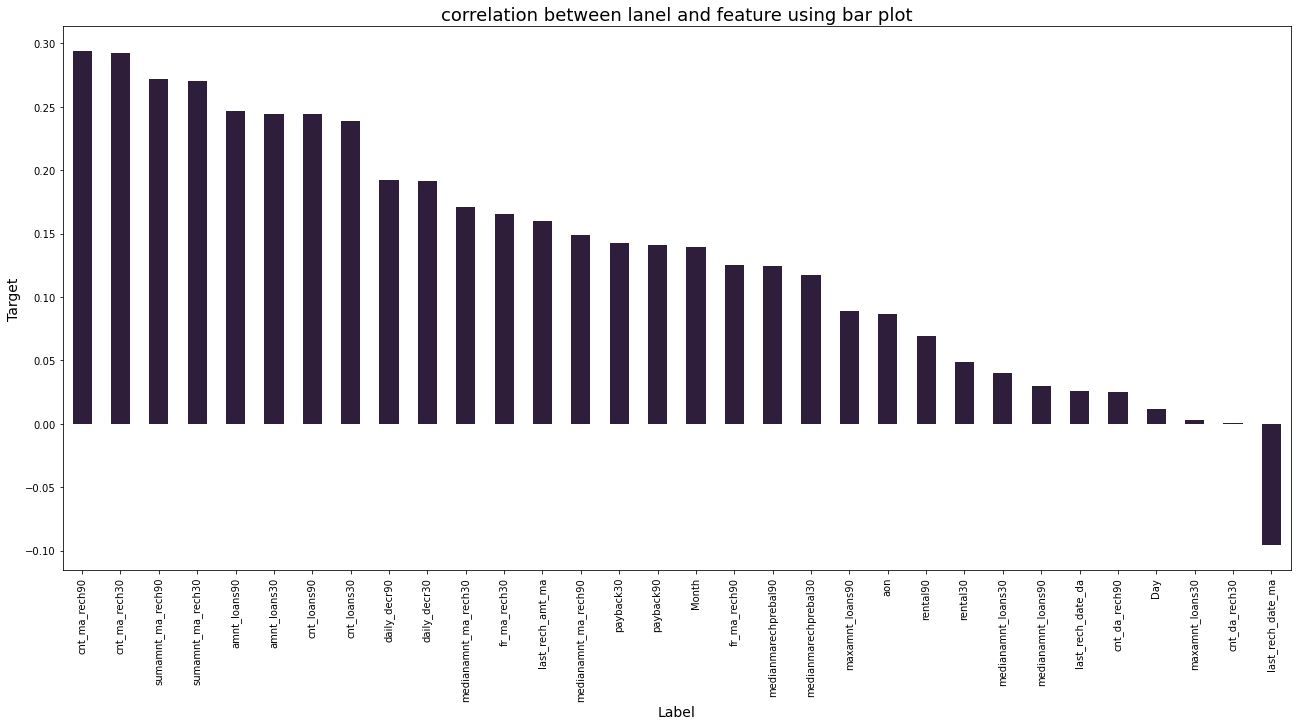

In [39]:
plt.figure(figsize=(22,10))
new_df.corr()['label'].sort_values(ascending=False).drop(['label']).plot(kind='bar')
plt.xlabel('Label',fontsize=14)
plt.ylabel('Target',fontsize=14)
plt.title('correlation between lanel and feature using bar plot',fontsize=18)
plt.show()

### Data Pre-processing

In [40]:
X = df.drop(["label"], axis = 1)
Y = df.label

In [41]:
from sklearn.preprocessing import power_transform
X = power_transform(X,method="yeo-johnson")
X

array([[-0.17711202,  0.33215731,  0.29918258, ...,  1.78398402,
         0.71082238,  0.39752455],
       [ 0.03645225,  1.11601957,  1.04508282, ..., -1.01891435,
        -0.41014406,  1.48012962],
       [-0.03465955, -0.007506  , -0.02820065, ..., -1.01891435,
         0.60997236,  1.48012962],
       ...,
       [ 0.13457591,  1.10045362,  1.03342252, ...,  0.75295344,
         1.54675826,  0.39752455],
       [ 0.30910014,  1.13605548,  1.06837956, ...,  1.33784819,
         1.18938807,  0.39752455],
       [ 0.27706161,  0.52502202,  0.48715722, ..., -1.01891435,
        -0.81940564,  0.39752455]])

## Model

### Finding best random State

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


accu = 0
for i in range(0,1000):
    X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = .25, random_state = i,  stratify=Y )
    mod = GaussianNB()
    mod.fit(X_train,Y_train)
    Y_pred = mod.predict(X_test)
    tempacc = accuracy_score(Y_test,Y_pred)
    if tempacc> accu:
        accu= tempacc
        best_rstate=i

print(f"Best Accuracy {accu*100} found on randomstate {best_rstate}")

Best Accuracy 74.28527806404824 found on randomstate 420


## Train Test Split

In [44]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=.3,random_state=i)

### LogisticRegression

In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score,confusion_matrix,classification_report,mean_absolute_error,mean_squared_error

LOR = LogisticRegression()
LOR.fit(X_train,Y_train)

# Prediction
predLOR = LOR.predict(X_test)
print('R2 Score :',r2_score(Y_test,predLOR))

# Mean Absolute Error(MAE)
print('Mean Absolute Error(MAE)',mean_absolute_error(Y_test,predLOR))

# Mean Squared Error(MSE)
print('Mean Squared Error',mean_squared_error(Y_test,predLOR))

# Root Mean Squared Error (RMSE)
print('Root Mean Squared Error',np.sqrt(mean_squared_error(Y_test,predLOR)))

print("-----------------------------------------------------")
# Accuracy Score
print(accuracy_score(Y_test, predLOR))
print("-----------------------------------------------------")
# Confusion Matrix
print(confusion_matrix(Y_test, predLOR))
print("-----------------------------------------------------")
# Classification Report
print(classification_report(Y_test,predLOR)) 

R2 Score : -0.05992338194149327
Mean Absolute Error(MAE) 0.11590699449728045
Mean Squared Error 0.11590699449728045
Root Mean Squared Error 0.34045116316041635
-----------------------------------------------------
0.8840930055027195
-----------------------------------------------------
[[ 1104  6754]
 [  534 54486]]
-----------------------------------------------------
              precision    recall  f1-score   support

           0       0.67      0.14      0.23      7858
           1       0.89      0.99      0.94     55020

    accuracy                           0.88     62878
   macro avg       0.78      0.57      0.58     62878
weighted avg       0.86      0.88      0.85     62878



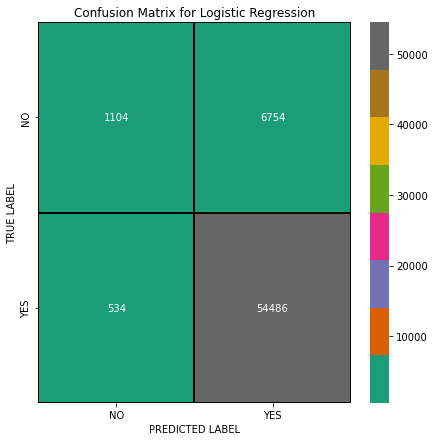

In [46]:
cm = confusion_matrix(Y_test,predLOR)

x_axis_labels = ['NO','YES']
y_axis_labels = ['NO','YES']

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Dark2",xticklabels=x_axis_labels,yticklabels=y_axis_labels)

plt.xlabel('PREDICTED LABEL')
plt.ylabel('TRUE LABEL')
plt.title('Confusion Matrix for Logistic Regression');

### Decision Tree Classifier

In [47]:
from sklearn.tree import DecisionTreeClassifier

# Checking accuracy for Decision Tree Classifier
DTC = DecisionTreeClassifier()
DTC.fit(X_train,Y_train)

# [Prediction]
predDTC = DTC.predict(X_test)
print('R2 Score:',r2_score(Y_test,predDTC))

# Mean Absolute Error(MAE)
print('Mean Absolute Error',mean_absolute_error(Y_test,predDTC))

# Mean Squared Error(MSE)
print('Mean Squared Error',mean_squared_error(Y_test,predDTC))

# Root Mean Squared Error (RMSE)
print('Root Mean Squared Error',np.sqrt(mean_squared_error(Y_test,predDTC)))
print("-----------------------------------------------------")
# Accuracy Score
print('Accuracy Score: ',accuracy_score(Y_test, predDTC))
print("-----------------------------------------------------")
# Confusion Matrix
print('Confusion Matrix:\n',confusion_matrix(Y_test, predDTC))
print("-----------------------------------------------------")
# Classification Report
print(classification_report(Y_test,predDTC)) 

R2 Score: -0.07432135323844835
Mean Absolute Error 0.11748147205699927
Mean Squared Error 0.11748147205699927
Root Mean Squared Error 0.34275570317209786
-----------------------------------------------------
Accuracy Score:  0.8825185279430008
-----------------------------------------------------
Confusion Matrix:
 [[ 4370  3488]
 [ 3899 51121]]
-----------------------------------------------------
              precision    recall  f1-score   support

           0       0.53      0.56      0.54      7858
           1       0.94      0.93      0.93     55020

    accuracy                           0.88     62878
   macro avg       0.73      0.74      0.74     62878
weighted avg       0.89      0.88      0.88     62878



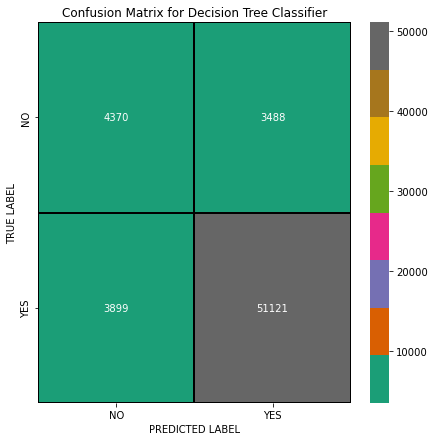

In [48]:
cm = confusion_matrix(Y_test,predDTC)

x_axis_labels = ['NO','YES']
y_axis_labels = ['NO','YES']

f,ax=plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Dark2",xticklabels=x_axis_labels,yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Decision Tree Classifier')
plt.show()

### Random Forest Classifier

In [49]:
from sklearn.ensemble import RandomForestClassifier

# Checking accuracy for Random Forest Classifier
RFC = RandomForestClassifier()
RFC.fit(X_train,Y_train)

# [Prediction]
predRFC = RFC.predict(X_test)
print('R2 Score:',r2_score(Y_test,predRFC))

# Mean Absolute Error(MAE)
print('Mean Absolute Error',mean_absolute_error(Y_test,predRFC))

# Mean Squared Error(MSE)
print('Mean Squared Error',mean_squared_error(Y_test,predRFC))

# Root Mean Squared Error (RMSE)
print('Root Mean Squared Error',np.sqrt(mean_squared_error(Y_test,predRFC)))
print("-----------------------------------------------------")
# Accuracy Score
print('Accuracy Score: ',accuracy_score(Y_test, predRFC))
print("-----------------------------------------------------")
# Confusion Matrix
print('Confusion Matrix:\n',confusion_matrix(Y_test, predRFC))
print("-----------------------------------------------------")
# Classification Report
print(classification_report(Y_test,predRFC))

R2 Score: 0.2696301832999205
Mean Absolute Error 0.07986895257482744
Mean Squared Error 0.07986895257482744
Root Mean Squared Error 0.28261095621866367
-----------------------------------------------------
Accuracy Score:  0.9201310474251726
-----------------------------------------------------
Confusion Matrix:
 [[ 3949  3909]
 [ 1113 53907]]
-----------------------------------------------------
              precision    recall  f1-score   support

           0       0.78      0.50      0.61      7858
           1       0.93      0.98      0.96     55020

    accuracy                           0.92     62878
   macro avg       0.86      0.74      0.78     62878
weighted avg       0.91      0.92      0.91     62878



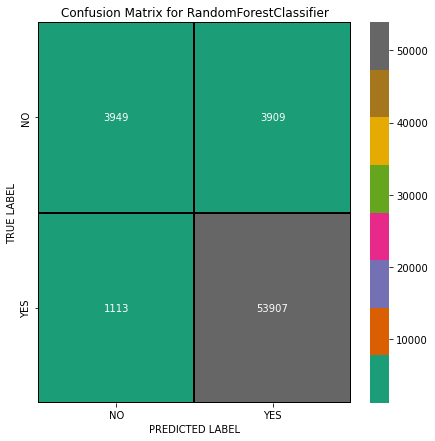

In [50]:
cm = confusion_matrix(Y_test,predRFC)

x_axis_labels = ["NO","YES"]
y_axis_labels = ["NO","YES"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Dark2",xticklabels=x_axis_labels,yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for RandomForestClassifier')
plt.show()

### KNeighborsClassifier

In [51]:
from sklearn.neighbors import KNeighborsClassifier

KNN = KNeighborsClassifier()
KNN.fit(X_train,Y_train)

# [Prediction]
predKNN = KNN.predict(X_test)
print('R2 Score:',r2_score(Y_test,predKNN))

# Mean Absolute Error(MAE)
print('Mean Absolute Error',mean_absolute_error(Y_test,predKNN))

# Mean Squared Error(MSE)
print('Mean Squared Error',mean_squared_error(Y_test,predKNN))

# Root Mean Squared Error (RMSE)
print('Root Mean Squared Error',np.sqrt(mean_squared_error(Y_test,predKNN)))
print("-----------------------------------------------------")
# Accuracy Score
print('Accuracy Score: ',accuracy_score(Y_test, predKNN))
print("-----------------------------------------------------")
# Confusion Matrix
print('Confusion Matrix:\n',confusion_matrix(Y_test, predKNN))
print("-----------------------------------------------------")
# Classification Report
print(classification_report(Y_test,predKNN))

R2 Score: 0.12157831683224207
Mean Absolute Error 0.09605903495658259
Mean Squared Error 0.09605903495658259
Root Mean Squared Error 0.3099339203065431
-----------------------------------------------------
Accuracy Score:  0.9039409650434174
-----------------------------------------------------
Confusion Matrix:
 [[ 3675  4183]
 [ 1857 53163]]
-----------------------------------------------------
              precision    recall  f1-score   support

           0       0.66      0.47      0.55      7858
           1       0.93      0.97      0.95     55020

    accuracy                           0.90     62878
   macro avg       0.80      0.72      0.75     62878
weighted avg       0.89      0.90      0.90     62878



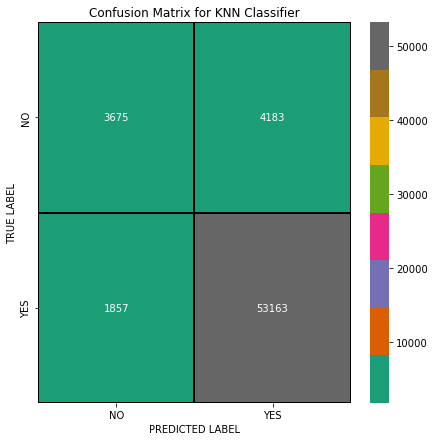

In [52]:
cm = confusion_matrix(Y_test,predKNN)

x_axis = ['NO','YES']
y_axis = ['NO','YES']

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot= True, linewidths=.2, linecolor='black', fmt= '.0f',ax=ax, cmap='Dark2', xticklabels= x_axis, yticklabels= y_axis)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for KNN Classifier')
plt.show()

### AdaBoost Classifier

In [53]:
from sklearn.ensemble import AdaBoostClassifier
ADA = AdaBoostClassifier()
ADA.fit(X_train,Y_train)

# [Prediction]
predADA = ADA.predict(X_test)
print('R2 Score:',r2_score(Y_test,predADA))

# Mean Absolute Error(MAE)
print('Mean Absolute Error',mean_absolute_error(Y_test,predADA))

# Mean Squared Error(MSE)
print('Mean Squared Error',mean_squared_error(Y_test,predADA))

# Root Mean Squared Error (RMSE)
print('Root Mean Squared Error',np.sqrt(mean_squared_error(Y_test,predADA)))
print("-----------------------------------------------------")
# Accuracy Score
print('Accuracy Score: ',accuracy_score(Y_test, predADA))
print("-----------------------------------------------------")
# Confusion Matrix
print('Confusion Matrix:\n',confusion_matrix(Y_test, predADA))
print("-----------------------------------------------------")
# Classification Report
print(classification_report(Y_test,predADA))

R2 Score: 0.16273615397404262
Mean Absolute Error 0.0915582556697096
Mean Squared Error 0.0915582556697096
Root Mean Squared Error 0.3025859475747504
-----------------------------------------------------
Accuracy Score:  0.9084417443302905
-----------------------------------------------------
Confusion Matrix:
 [[ 2844  5014]
 [  743 54277]]
-----------------------------------------------------
              precision    recall  f1-score   support

           0       0.79      0.36      0.50      7858
           1       0.92      0.99      0.95     55020

    accuracy                           0.91     62878
   macro avg       0.85      0.67      0.72     62878
weighted avg       0.90      0.91      0.89     62878



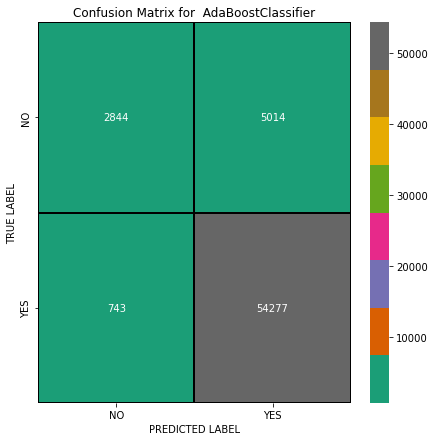

In [54]:
cm = confusion_matrix(Y_test,predADA)

x_axis_labels = ["NO","YES"]
y_axis_labels = ["NO","YES"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Dark2",xticklabels=x_axis_labels,yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for  AdaBoostClassifier')
plt.show()

### Gradient Boosting Classifier

In [55]:
from sklearn.ensemble import GradientBoostingClassifier
GBC = GradientBoostingClassifier()
GBC.fit(X_train,Y_train)

# [Prediction]
predGBC = GBC.predict(X_test)
print('R2 Score:',r2_score(Y_test,predGBC))

# Mean Absolute Error(MAE)
print('Mean Absolute Error',mean_absolute_error(Y_test,predGBC))

# Mean Squared Error(MSE)
print('Mean Squared Error',mean_squared_error(Y_test,predGBC))

# Root Mean Squared Error (RMSE)
print('Root Mean Squared Error',np.sqrt(mean_squared_error(Y_test,predGBC)))
print("-----------------------------------------------------")
# Accuracy Score
print('Accuracy Score: ',accuracy_score(Y_test, predGBC))
print("-----------------------------------------------------")
# Confusion Matrix
print('Confusion Matrix:\n',confusion_matrix(Y_test, predGBC))
print("-----------------------------------------------------")
# Classification Report
print(classification_report(Y_test,predGBC))

R2 Score: 0.24447009204362546
Mean Absolute Error 0.08262031235090174
Mean Squared Error 0.08262031235090174
Root Mean Squared Error 0.28743749294568677
-----------------------------------------------------
Accuracy Score:  0.9173796876490983
-----------------------------------------------------
Confusion Matrix:
 [[ 3741  4117]
 [ 1078 53942]]
-----------------------------------------------------
              precision    recall  f1-score   support

           0       0.78      0.48      0.59      7858
           1       0.93      0.98      0.95     55020

    accuracy                           0.92     62878
   macro avg       0.85      0.73      0.77     62878
weighted avg       0.91      0.92      0.91     62878



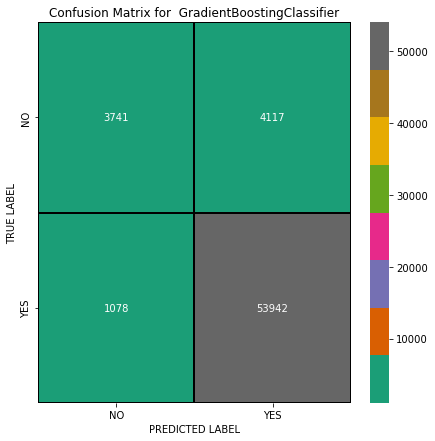

In [56]:
cm = confusion_matrix(Y_test,predGBC)

x_axis_labels = ["NO","YES"]
y_axis_labels = ["NO","YES"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Dark2",xticklabels=x_axis_labels,yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for  GradientBoostingClassifier')
plt.show()

### Naive Bias Classifier

In [57]:
from sklearn.naive_bayes import GaussianNB
GNB = GradientBoostingClassifier()
GNB.fit(X_train,Y_train)

# [Prediction]
predGNB = GNB.predict(X_test)
print('R2 Score:',r2_score(Y_test,predGNB))

# Mean Absolute Error(MAE)
print('Mean Absolute Error',mean_absolute_error(Y_test,predGNB))

# Mean Squared Error(MSE)
print('Mean Squared Error',mean_squared_error(Y_test,predGNB))

# Root Mean Squared Error (RMSE)
print('Root Mean Squared Error',np.sqrt(mean_squared_error(Y_test,predGNB)))
print("-----------------------------------------------------")
# Accuracy Score
print('Accuracy Score: ',accuracy_score(Y_test, predGNB))
print("-----------------------------------------------------")
# Confusion Matrix
print('Confusion Matrix:\n',confusion_matrix(Y_test, predGNB))
print("-----------------------------------------------------")
# Classification Report
print(classification_report(Y_test,predGNB))

R2 Score: 0.24447009204362546
Mean Absolute Error 0.08262031235090174
Mean Squared Error 0.08262031235090174
Root Mean Squared Error 0.28743749294568677
-----------------------------------------------------
Accuracy Score:  0.9173796876490983
-----------------------------------------------------
Confusion Matrix:
 [[ 3741  4117]
 [ 1078 53942]]
-----------------------------------------------------
              precision    recall  f1-score   support

           0       0.78      0.48      0.59      7858
           1       0.93      0.98      0.95     55020

    accuracy                           0.92     62878
   macro avg       0.85      0.73      0.77     62878
weighted avg       0.91      0.92      0.91     62878



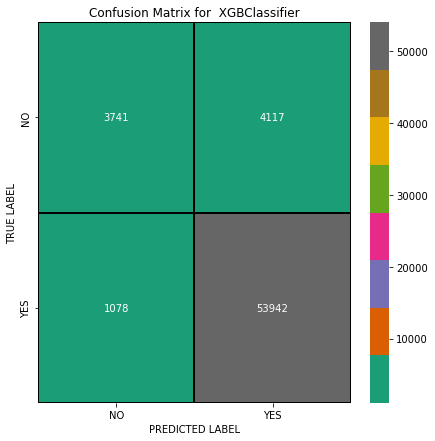

In [58]:
cm = confusion_matrix(Y_test,predGNB)

x_axis_labels = ["NO","YES"]
y_axis_labels = ["NO","YES"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Dark2",xticklabels=x_axis_labels,yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for  XGBClassifier')
plt.show()

### XGB Classifier

In [59]:
from xgboost import XGBClassifier
XGB = XGBClassifier()
XGB.fit(X_train,Y_train)

# [Prediction]
predXGB = XGB.predict(X_test)
print('R2 Score:',r2_score(Y_test,predXGB))

# Mean Absolute Error(MAE)
print('Mean Absolute Error',mean_absolute_error(Y_test,predXGB))

# Mean Squared Error(MSE)
print('Mean Squared Error',mean_squared_error(Y_test,predXGB))

# Root Mean Squared Error (RMSE)
print('Root Mean Squared Error',np.sqrt(mean_squared_error(Y_test,predXGB)))
print("-----------------------------------------------------")
# Accuracy Score
print('Accuracy Score: ',accuracy_score(Y_test, predXGB))
print("-----------------------------------------------------")
# Confusion Matrix
print('Confusion Matrix:\n',confusion_matrix(Y_test, predXGB))
print("-----------------------------------------------------")
# Classification Report
print(classification_report(Y_test,predXGB))

R2 Score: 0.2827192481153341
Mean Absolute Error 0.07843760933871942
Mean Squared Error 0.07843760933871942
Root Mean Squared Error 0.28006715148106787
-----------------------------------------------------
Accuracy Score:  0.9215623906612805
-----------------------------------------------------
Confusion Matrix:
 [[ 4295  3563]
 [ 1369 53651]]
-----------------------------------------------------
              precision    recall  f1-score   support

           0       0.76      0.55      0.64      7858
           1       0.94      0.98      0.96     55020

    accuracy                           0.92     62878
   macro avg       0.85      0.76      0.80     62878
weighted avg       0.92      0.92      0.92     62878



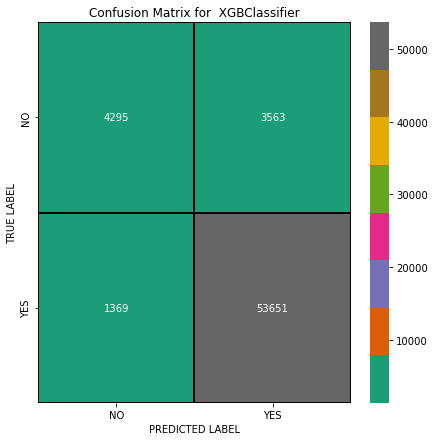

In [60]:
cm = confusion_matrix(Y_test,predXGB)

x_axis_labels = ["NO","YES"]
y_axis_labels = ["NO","YES"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Dark2",xticklabels=x_axis_labels,yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for  XGBClassifier')
plt.show()

### Support Vector Machine classifier

In [61]:
from sklearn.svm import SVC

# Checking accuracy for Support Vector Machine Classifier
svc = SVC()
svc.fit(X_train,Y_train)

# [Prediction]
predsvc = svc.predict(X_test)
print('R2 Score:',r2_score(Y_test,predsvc))

# Mean Absolute Error(MAE)
print('Mean Absolute Error',mean_absolute_error(Y_test,predsvc))

# Mean Squared Error(MSE)
print('Mean Squared Error',mean_squared_error(Y_test,predsvc))

# Root Mean Squared Error (RMSE)
print('Root Mean Squared Error',np.sqrt(mean_squared_error(Y_test,predsvc)))
print("-----------------------------------------------------")
# Accuracy Score
print('Accuracy Score: ',accuracy_score(Y_test, predsvc))
print("-----------------------------------------------------")
# Confusion Matrix
print('Confusion Matrix:\n',confusion_matrix(Y_test, predsvc))
print("-----------------------------------------------------")
# Classification Report
print(classification_report(Y_test,predsvc))

R2 Score: 0.11925137197616853
Mean Absolute Error 0.09631349597633512
Mean Squared Error 0.09631349597633512
Root Mean Squared Error 0.3103441573098084
-----------------------------------------------------
Accuracy Score:  0.9036865040236649
-----------------------------------------------------
Confusion Matrix:
 [[ 2669  5189]
 [  867 54153]]
-----------------------------------------------------
              precision    recall  f1-score   support

           0       0.75      0.34      0.47      7858
           1       0.91      0.98      0.95     55020

    accuracy                           0.90     62878
   macro avg       0.83      0.66      0.71     62878
weighted avg       0.89      0.90      0.89     62878



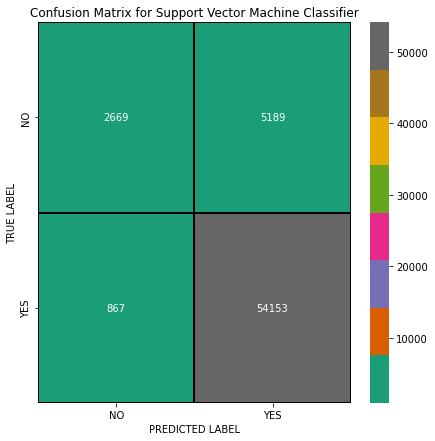

In [62]:
cm = confusion_matrix(Y_test,predsvc)

x_axis_labels = ["NO","YES"]
y_axis_labels = ["NO","YES"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Dark2",xticklabels=x_axis_labels,yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Support Vector Machine Classifier')
plt.show()

### Extra Trees Classifier 

In [63]:
from sklearn.ensemble import ExtraTreesClassifier

# Checking accuracy for Support Vector Machine Classifier
ETC = ExtraTreesClassifier()
ETC.fit(X_train,Y_train)

# [Prediction]
predETC = ETC.predict(X_test)
print('R2 Score:',r2_score(Y_test,predETC))

# Mean Absolute Error(MAE)
print('Mean Absolute Error',mean_absolute_error(Y_test,predETC))

# Mean Squared Error(MSE)
print('Mean Squared Error',mean_squared_error(Y_test,predETC))

# Root Mean Squared Error (RMSE)
print('Root Mean Squared Error',np.sqrt(mean_squared_error(Y_test,predETC)))
print("-----------------------------------------------------")
# Accuracy Score
print('Accuracy Score: ',accuracy_score(Y_test, predETC))
print("-----------------------------------------------------")
# Confusion Matrix
print('Confusion Matrix:\n',confusion_matrix(Y_test, predETC))
print("-----------------------------------------------------")
# Classification Report
print(classification_report(Y_test,predETC))

R2 Score: 0.25494134389595635
Mean Absolute Error 0.08147523776201533
Mean Squared Error 0.08147523776201533
Root Mean Squared Error 0.28543867600942824
-----------------------------------------------------
Accuracy Score:  0.9185247622379846
-----------------------------------------------------
Confusion Matrix:
 [[ 3920  3938]
 [ 1185 53835]]
-----------------------------------------------------
              precision    recall  f1-score   support

           0       0.77      0.50      0.60      7858
           1       0.93      0.98      0.95     55020

    accuracy                           0.92     62878
   macro avg       0.85      0.74      0.78     62878
weighted avg       0.91      0.92      0.91     62878



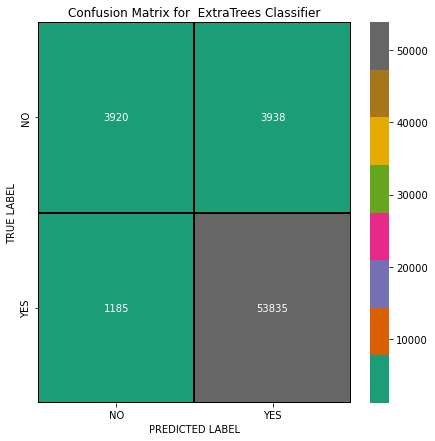

In [64]:
cm = confusion_matrix(Y_test,predETC)

x_axis_labels = ["NO","YES"]
y_axis_labels = ["NO","YES"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Dark2",xticklabels=x_axis_labels,yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for  ExtraTrees Classifier')
plt.show()

### Cross Validation Score

In [65]:
from sklearn.model_selection import cross_val_score

#cv score for Logistic Regression
print('Logistic Regression',cross_val_score(LOR,X,Y,cv=5).mean())

# cv score for Decision Tree Classifier
print('Decision Tree Classifier',cross_val_score(DTC,X,Y,cv=5).mean())

# cv score for Random Forest Classifier
print('Random Forest Classifier',cross_val_score(RFC,X,Y,cv=5).mean())

# cv score for KNeighbors Classifier
print('KNeighbors Classifier',cross_val_score(KNN,X,Y,cv=5).mean())

# cv score for Support Vector  Classifier
print('Support Vector  Classifier',cross_val_score(svc,X,Y,cv=5).mean())

# cv score for Extra Trees Classifier
print('Extra Trees Classifier',cross_val_score(ETC,X,Y,cv=5).mean())

# cv score for Naive Bias Classifier
print('Naive Bias Classifier:',cross_val_score(GNB,X,Y,cv=5).mean())

# cv score for AdaBoosting Classifier
print('AdaBoosting Classifier:',cross_val_score(ADA,X,Y,cv=5).mean())

# cv score for Gradient Boosting Classifier
print('Gradient Boosting Classifier',cross_val_score(XGB,X,Y,cv=5).mean())

Logistic Regression 0.8841797342055424
Decision Tree Classifier 0.8839650471752372
Random Forest Classifier 0.9208796142612441
KNeighbors Classifier 0.904886645304226
Support Vector  Classifier 0.9057788453470266
Extra Trees Classifier 0.9186848771906421
Naive Bias Classifier: 0.9188470975324747
AdaBoosting Classifier: 0.910397355235094
Gradient Boosting Classifier 0.9231745571956648


### Hyper Parameter Tuning

In [66]:
parameters = {'criterion' : ['gini','entropy'],
              'random_state' : [10, 50, 1000],
              'max_depth' : [0, 10, 20],
              'n_jobs' : [-2, -1, 1],
              'n_estimators' : [50,100, 200, 300]}

In [72]:
from sklearn.model_selection import GridSearchCV
GCV=GridSearchCV(RandomForestClassifier(),parameters,cv=3)
GCV.fit(X_train,Y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [0, 10, 20],
                         'n_estimators': [50, 100, 200, 300],
                         'n_jobs': [-2, -1, 1],
                         'random_state': [10, 50, 1000]})

In [73]:
GCV.best_params_

{'criterion': 'entropy',
 'max_depth': 20,
 'n_estimators': 200,
 'n_jobs': -2,
 'random_state': 1000}

In [81]:
Lable_Data = RandomForestClassifier(criterion='entropy', max_depth=20, n_estimators=300, n_jobs=-2, random_state=1000)
Lable_Data.fit(X_train, Y_train)
pred = Lable_Data.predict(X_test)
acc=accuracy_score(Y_test,pred)
print('After HyperParameter tuning we have received an accuracy score of',acc*100)

After HyperParameter tuning we have received an accuracy score of 92.03059893762524


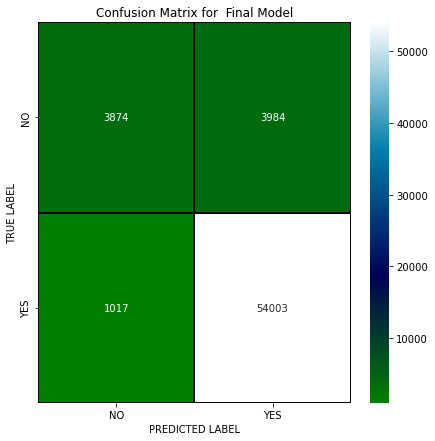

In [75]:
cm = confusion_matrix(Y_test,pred)

x_axis_labels = ["NO","YES"]
y_axis_labels = ["NO","YES"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="ocean",xticklabels=x_axis_labels,yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for  Final Model')
plt.show()

### Plotting ROC and compare AUC for the final model

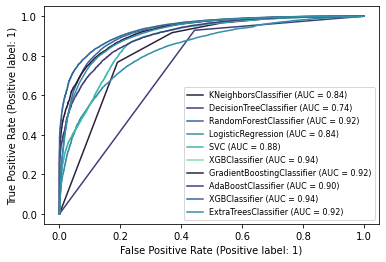

In [76]:
from sklearn import datasets 
from sklearn import metrics
from sklearn import model_selection
from sklearn.metrics import plot_roc_curve 

disp = plot_roc_curve(KNN,X_test,Y_test)
plot_roc_curve(DTC, X_test, Y_test, ax=disp.ax_)     
plot_roc_curve(RFC, X_test, Y_test, ax=disp.ax_)
plot_roc_curve(LOR, X_test, Y_test, ax=disp.ax_)
plot_roc_curve(svc, X_test, Y_test, ax=disp.ax_)
plot_roc_curve(XGB, X_test, Y_test, ax=disp.ax_)
plot_roc_curve(GNB, X_test, Y_test, ax=disp.ax_)
plot_roc_curve(ADA, X_test, Y_test, ax=disp.ax_)
plot_roc_curve(XGB, X_test, Y_test, ax=disp.ax_)
plot_roc_curve(ETC, X_test, Y_test, ax=disp.ax_)

plt.legend(prop={'size':8}, loc='lower right')
plt.show()

### Saving the Model

In [78]:
import joblib
joblib.dump(Lable_Data,"Micro-Credit.pkl")

['Micro-Credit.pkl']

### Predicting the saved model

In [79]:
model=joblib.load("Micro-Credit.pkl")

#Prediction
prediction = model.predict(X_test)
prediction

array([1, 1, 0, ..., 1, 1, 1], dtype=int64)

In [80]:
pd.DataFrame([model.predict(X_test)[:],Y_test[:]],index=["Predicted","Original"]).T

Predicted  Original
0              1         1
1              1         1
2              0         0
3              1         1
4              1         1
...          ...       ...
62873          1         1
62874          1         1
62875          1         1
62876          1         1
62877          1         0

[62878 rows x 2 columns]